# Unit tests

In [1]:
import unittest
import math
from pierpont import util
from pierpont import ppont

###############################################################################
class TestFrechet(unittest.TestCase):
    def test_Frechet1(self):
        t1  = [0.2, 1.5, 2.3, 2.9, 4.1, 5.6, 7.2, 8.2]
        pin = [2.0, 2.8, 1.6, 1.8, 3.1, 2.9, 1.1, 1.3]
        t2  = [0.3, 3.2, 3.8, 5.2, 6.5, 7.0, 8.9]
        qin = [1.6, 3.0, 1.8, 3.1, 2.8, 0.8, 0.6]
        fd = util.frechet(t1, pin, t2, qin)
        self.assertAlmostEqual(1.6970562748477138, fd)
    def test_Frechet2(self):
        t1  = [0, 0, 0, 2]
        pin = [0, 1, 2, 4]
        t2  = [2, 1, 3, 4]
        qin = [0, 1, 2, 4]
        fd = util.frechet(t1, pin, t2, qin)
        self.assertAlmostEqual(math.sqrt(5), fd)
    def test_Frechet3(self):
        px = [0.0, 1.0, 2.0, 3.0, 4.0]
        py = [0.0, 0.0, 0.0, 0.0, 0.0]
        qx = [0.0, 1.0, 2.0, 3.0, 4.0]
        qy = [1.0, 1.1, 1.2, 1.1, 1.0]
        fd = util.frechet(px, py, qx, qy)
        self.assertAlmostEqual(1.2, fd)

###############################################################################
class TestConvert(unittest.TestCase):
    
    def setUp(self):
        self.convert = ppont.Convert()
        
    def test_KnotToFps(self):
        self.assertAlmostEqual(123.001, self.convert.units([72.876,"kt"],"fps"), places=3)
    def test_FpsToKnot(self):
        self.assertAlmostEqual(78.8, self.convert.units([133.0, "fps"], "kt"), places=3)
    def test_MinToSec(self):
        self.assertAlmostEqual(300.0, self.convert.units([5.0, "min"],"s")) 
    def test_FeetToMeter(self):
        self.assertAlmostEqual(395.9352, self.convert.units([1299.0, "ft"], "m"), places=4)
        self.assertAlmostEqual(54.864, self.convert.units([180.0, "ft"], "m"), places=4)
    def test_MeterToFeet(self):
        self.assertAlmostEqual(1299.0, self.convert.units([395.9352, "m"], "ft"), places=4)
        self.assertAlmostEqual(1742.12598, self.convert.units([531, "m"], "ft"), places=4)
        self.assertAlmostEqual(1299.0, self.convert.units([395.9352, "m"],"ft"), places=4)
        self.assertAlmostEqual(328.084, self.convert.units([100, "m"],"ft"), places=3)
        self.assertAlmostEqual(3280.84, self.convert.units([1000, "m"],"ft"), places=2)
    def test_NmToFeet(self):
        self.assertAlmostEqual(3967703.4, self.convert.units([653, "nmi"], "ft"), places=1)
    def test_FeetToNm(self):
        self.assertAlmostEqual(653, self.convert.units([3967703.4, "ft"], "nmi"), places=1)
    def test_Meter2ToFeet2(self):
        self.assertAlmostEqual(10.763910, self.convert.units([1, "m2"], "ft2"), places=6)
        self.assertAlmostEqual(1076.3910, self.convert.units([100, "m2"], "ft2"), places=4)
        self.assertAlmostEqual(10763.910, self.convert.units([1000, "m2"], "ft2"), places=1)
    def test_Feet2ToMeter2(self):
        self.assertAlmostEqual(178.5596, self.convert.units([1922, "ft2"], "m2"), places=4)
    def test_LbfToNewton(self):
        self.assertAlmostEqual(13.0, self.convert.units([2.92252, "lbf"], "N"), places=4)
        self.assertAlmostEqual(4412.64, self.convert.units([992, "lbf"], "N"), places=2)
    def test_NewtonToLb(self):
        self.assertAlmostEqual(7.396214228, self.convert.units([32.9, "N"], "lbf"), places=4)
        self.assertAlmostEqual(5.62022, self.convert.units([25, "N"], "lbf"), places=5)
        self.assertAlmostEqual(56.2022, self.convert.units([250, "N"], "lbf"), places=4)
    def test_SlugToKg(self):
        self.assertAlmostEqual(917.95649475, self.convert.units([62.9, "slug"], "kg"), places=5)
    def test_KgToSlug(self):
        self.assertAlmostEqual(6.7425417603, self.convert.units([98.4, "kg"], "slug"), places=5)
        self.assertAlmostEqual(1.09635, self.convert.units([16, "kg"], "slug"), places=5)
        self.assertAlmostEqual(10.9635, self.convert.units([160, "kg"], "slug"), places=4)
    def test_Slugft2ToKgm2(self):
        self.assertAlmostEqual(1.0, self.convert.units([0.73756215, "slugft2"], "kgm2"), places=7)
        self.assertAlmostEqual(21.6930872, self.convert.units([16.0, "slugft2"], "kgm2"), places=5)
    def test_Kgm2ToSlugft2(self):
        self.assertAlmostEqual(1.0, self.convert.units([1.35582, "kgm2"], "slugft2"), places=5)
        self.assertAlmostEqual(43.5161664, self.convert.units([59, "kgm2"], "slugft2"), places=7)
        self.assertAlmostEqual(435.161664, self.convert.units([590, "kgm2"], "slugft2"), places=6)
    def test_DegreeToRadian(self):
        self.assertAlmostEqual(math.pi, self.convert.units([180.0, "deg"], "rad"), places=6)
        self.assertAlmostEqual(0.5*math.pi, self.convert.units([90.0, "deg"], "rad"), places=6)
    def test_RadianToDegree(self):
        self.assertAlmostEqual(90, self.convert.units([1.57079632679, "rad"], "deg"), places=6)
    def test_Deg_sToRad_s(self):
        self.assertAlmostEqual(1.5*math.pi, self.convert.units([270.0, "deg_s"], "rad_s"), places=6)
    def test_Rad_sToDeg_s(self):
        val = 0.25*math.pi
        self.assertAlmostEqual(45, self.convert.units([val, "rad_s"], "deg_s"), places=6)
    def test_MpsToKnot(self):
        self.assertAlmostEqual(29.15767, self.convert.units([15, "m_s"], "kt"), places=4)
        self.assertAlmostEqual(194.3844, self.convert.units([100, "m_s"], "kt"), places=4)
    def test_KnotToMps(self):
        self.assertAlmostEqual(18.00556, self.convert.units([35, "kt"], "m_s"), places=4)
        self.assertAlmostEqual(18.00556, self.convert.units([35, "nmi_h"], "m_s"), places=4)
    def test_KmTom(self):
        self.assertAlmostEqual(93200, self.convert.units([93.2, "km"], "m"))
    def test_Km_sTom_s(self):
        self.assertAlmostEqual(4221, self.convert.units([4.221, "km_s"], "m_s"))   
    def test_NoUnits(self):
        with self.assertRaises(ValueError):
            self.convert.units([4.221, "x"], "m_s")
    def test_ToSI(self):
        self.assertAlmostEqual( 15.24, self.convert.to_si([50, "ft"]) ) 
        self.assertAlmostEqual( 50.0, self.convert.to_si([50, "m"]) )
        
###############################################################################
class TestEarth(unittest.TestCase):
    
    def setUp(self):
        self.earth = ppont.Earth()
        
    def test_GravityConstant(self):
        self.assertAlmostEqual(9.80665, self.earth.gravity_constant_m_s2)
    def test_SemiMinor(self):
        self.assertAlmostEqual(6356752.3, self.earth.semiMinor_m, places=1)
    def test_Eccentricity(self):
        self.assertAlmostEqual(8.18191908426e-2, self.earth.eccentricity)
    def test_AirData0m(self):
        self.earth.air_data(0)
        self.assertAlmostEqual(1.225, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(288.15, self.earth.temperature_dgK, places=2)
        self.assertAlmostEqual(101325, self.earth.pressure_Pa, places=0)
        self.assertAlmostEqual(340.294, self.earth.speedOfSound_m_s, places=3)
    def test_AirData2000m(self):
        self.earth.air_data(2000)
        self.assertAlmostEqual(1.00649, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(275.154, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(79501.8, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(332.532, self.earth.speedOfSound_m_s, places=3)
    def test_AirData5000m(self):
        self.earth.air_data(5000)
        self.assertAlmostEqual(0.736116, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(255.676, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(54048.9, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(320.545, self.earth.speedOfSound_m_s, places=3)
    def test_AirData12000m(self):
        self.earth.air_data(12000)
        self.assertAlmostEqual(0.311940, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(216.65, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(19399.5, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(295.0695, self.earth.speedOfSound_m_s, places=3)
    def test_AirData26000m(self):
        self.earth.air_data(26000)
        self.assertAlmostEqual(0.03425716, self.earth.airDensity_kg_m3, places=7)
        self.assertAlmostEqual(222.544, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(2188.41, self.earth.pressure_Pa, places=2)
        self.assertAlmostEqual(299.0562, self.earth.speedOfSound_m_s, places=3)
    def test_EcefToLlaZhu(self):
        self.earth.ecef_to_lla_Zhu(1191786.0, -5157122.0, 3562840.0)
        self.assertAlmostEqual(34.123455, math.degrees(self.earth.latitude_rad), places=6)
        self.assertAlmostEqual(-76.987654, math.degrees(self.earth.longitude_rad), places=6)
        self.assertAlmostEqual(9000.0, self.earth.altitudeMsl_m, places=1)
    def test_LlaToEcef(self):
        self.earth.latitude_rad = math.radians(34.123456)
        self.earth.longitude_rad = math.radians(-76.987654)
        self.earth.altitudeMsl_m = 9000.0
        [x, y, z] = self.earth.lla_to_ecef()
        self.assertAlmostEqual(1191786.0, x, places=0)
        self.assertAlmostEqual(-5157122.0, y, places=0)
        self.assertAlmostEqual(3562840.0, z, places=0)
        
###############################################################################
class TestMoon(unittest.TestCase):

    def setUp(self):
        self.moon = ppont.Moon()
        
    def test_MoonGravity(self):
        self.assertAlmostEqual(1.62242, self.moon.gravity(0,0), places=5)
        
###############################################################################
class TestMars(unittest.TestCase):

    def setUp(self):
        self.mars = ppont.Mars()
        
    def test_MarsGravity(self):
        self.assertAlmostEqual(3.724179, self.mars.gravity(0,0), places=5)
        
###############################################################################
class TestQuaternion(unittest.TestCase):
        
    def test_Qinverse(self):
        q0 = ppont.Quaternion(4,7,8,9)
        q0i = ~q0
        self.assertEqual( 4, q0i.n)
        self.assertEqual(-7, q0i.x)
        self.assertEqual(-8, q0i.y)
        self.assertEqual(-9, q0i.z)
    def test_Qadd(self):
        q1 = ppont.Quaternion(2,3,4,5)
        q2 = ppont.Quaternion(8,9,10,11)
        q3 = q1 + q2
        self.assertEqual(10, q3.n)
        self.assertEqual(12, q3.x)
        self.assertEqual(14, q3.y)
        self.assertEqual(16, q3.z)
    def test_Qsubtract(self):
        q3 = ppont.Quaternion(4,7,8,9) - ppont.Quaternion(6,3,2,1)
        self.assertEqual(-2, q3.n)
        self.assertEqual(4, q3.x)
        self.assertEqual(6, q3.y)
        self.assertEqual(8, q3.z)
    def test_QxQ(self):
        q1 = ppont.Quaternion(2,3,4,5)
        q2 = ppont.Quaternion(8,9,10,11)
        q4 = q1 * q2
        self.assertEqual(-106, q4.n)
        self.assertEqual(36, q4.x)
        self.assertEqual(64, q4.y)
        self.assertEqual(56, q4.z)
    #def test_QxScalar(self):
    #    q1 = ppont.Quaternion(2,3,4,5)
    #    q5 = 7.0 * q1
    #    self.assertEqual(14, q5.n)
    #    self.assertEqual(21, q5.x)
    #    self.assertEqual(28, q5.y)
    #    self.assertEqual(35, q5.z)
    #    q2 = ppont.Quaternion(8,9,10,11)
    #    q6 = q2 * 10
    #    self.assertEqual(80, q6.n)
    #    self.assertEqual(90, q6.x)
    #    self.assertEqual(100, q6.y)
    #    self.assertEqual(110, q6.z)
    def test_QsetPitchRollYaw(self):
        q6 = ppont.Quaternion(1,0,0,0)
        q6.set_roll_pitch_yaw(0.3,-0.7,3.11)
        self.assertAlmostEqual(-0.0365642, q6.n)
        self.assertAlmostEqual(0.3412225, q6.x)
        self.assertAlmostEqual(0.1350051, q6.y)
        self.assertAlmostEqual(0.9295181, q6.z)
    def test_QEulerAngles(self):
        q6 = ppont.Quaternion(-0.0365642, 0.3412225, 0.1350051, 0.9295181)
        [roll, pitch, yaw] = q6.euler_angles()
        self.assertAlmostEqual( 0.3, roll)
        self.assertAlmostEqual(-0.7, pitch)
        self.assertAlmostEqual(3.11, yaw)
        q7 = ppont.Quaternion(0.6680766, 0.2325211, 0.1160514, 0.6972372)
        [roll, pitch, yaw] = q7.euler_angles()
        self.assertAlmostEqual( 0.5, roll, places=6)
        self.assertAlmostEqual(-0.17, pitch, places=6)
        self.assertAlmostEqual(1.57, yaw, places=6)
    def test_QNormalize(self):
        q8 = ppont.Quaternion(6,-6,6,6)
        q8.normalize()
        self.assertAlmostEqual( 0.5, q8.n)
        self.assertAlmostEqual(-0.5, q8.x)
        self.assertAlmostEqual( 0.5, q8.y)
        self.assertAlmostEqual( 0.5, q8.z)
        q9 = ppont.Quaternion(1,3,-2,7)
        q9.normalize()
        mag = math.sqrt(1 + 9 + 4 + 49)
        self.assertAlmostEqual( 1.0/mag, q9.n)
        self.assertAlmostEqual( 3.0/mag, q9.x)
        self.assertAlmostEqual(-2.0/mag, q9.y)
        self.assertAlmostEqual( 7.0/mag, q9.z)
        
###############################################################################
class TestIntegrator(unittest.TestCase):
        
    def setUp(self):
        self.it = ppont.BaseIntegrator()
        
    def test_RungeKutta4(self):
        # first differential equation
        def I1p(arg):
            return (-4.0*arg[0] + 3.0*arg[1] + 6)

        # second differential equation
        def I2p(arg):
            return (-2.4*arg[0] + 1.6*arg[1] + 3.6)
        
        h = 0.1            # time step
        Xdot = [I1p, I2p]  # list of differential equations
        arg = [0, 0]       # initial conditions
        T = [.1, .2, .3, .4, .5]
        I1 = [ 0.538255, 0.9684983,  1.310717,  1.581263, 1.793505]
        I2 = [0.3196263, 0.5687817, 0.7607328, 0.9063208, 1.014402]
        for (t,i1,i2) in zip(T,I1,I2):
            wOut = self.it.runge_kutta_4(h, Xdot, arg)
            arg = wOut
            
            self.assertAlmostEqual( wOut[0], i1, places=5)
            self.assertAlmostEqual( wOut[1], i2, places=5)
            
###############################################################################
class TestSimulation(unittest.TestCase):
        
    def setUp(self):
        self.sim = ppont.Simulation("oblate:earth")
        
    def test_IC(self):
        icTest = {
            "newtonTest": [36.2, "lbf"],
            "inertiaTest": [78.0, "slugft2"],
            "feetTest": [1742.12598, "ft"],
            "fpsTest": [32.0, "ft_s"],
            "ft2Test": [1514, "ft2"],
            "degTest": [180, "deg"],
            "dpsTest": [45.0, "deg_s"],
            "kmTest": [93.2, "km"],
            "kpsTest": [4.221, "km_s"],
            "newtonTest2": [4.5, "n"]
        }
        icData = self.sim.set_ic(icTest)
        self.assertAlmostEqual(161.0256, icData["newtonTest"], places=3)
        self.assertAlmostEqual(105.7538010, icData["inertiaTest"], places=6)
        self.assertAlmostEqual(531.0, icData["feetTest"], places=5)
        self.assertAlmostEqual(9.75360, icData["fpsTest"], places=4)
        self.assertAlmostEqual(140.6552, icData["ft2Test"], places=4)
        self.assertAlmostEqual(math.pi, icData["degTest"], places=6)
        self.assertAlmostEqual(0.25*math.pi, icData["dpsTest"], places=6)
        self.assertAlmostEqual(93200, icData["kmTest"], places=6)
        self.assertAlmostEqual(4221, icData["kpsTest"], places=6)
        self.assertAlmostEqual(4.5, icData["newtonTest2"], places=1)
    def test_ToSI(self):
        self.assertAlmostEqual(30.48, self.sim.to_si([100,"ft"]), places=2)
    def test_SaveData(self):
        impLabel = \
        {
            'altitudeMsl_ft': ['ft', 'm'], 
            'longitude_deg': ['deg', 'rad'],
            'latitude_deg': ['deg', 'rad'],
            'localGravity_ft_s2': ['ft_s2', 'm_s2'],
            'gePosition_ft_X': ['ft', 'm'], 
            'gePosition_ft_Y': ['ft', 'm'], 
            'gePosition_ft_Z': ['ft', 'm'],
            'eulerAngle_deg_Yaw': ['deg', 'rad'],
            'eulerAngle_deg_Pitch': ['deg', 'rad'],
            'eulerAngle_deg_Roll': ['deg', 'rad'],
            'speedOfSound_ft_s': ['ft_s', 'm_s'],
            'feVelocity_ft_s_X': ['ft_s', 'm_s'],
            'bodyAngularRateWrtEi_deg_s_Roll': ['deg_s', 'rad_s'],
            'aero_bodyForce_lbf_X': ['lbf', 'N'],  
            'trueAirspeed_nmi_h':  ['nmi_h', 'm_s']
        }
        self.sim.Eom.record_data('time', 1)
        self.sim.Eom.record_data('time', 2)
        self.sim.Eom.record_data('time', 3)
        self.assertAlmostEqual(1, self.sim.Eom.Metric["time"][0])
        self.assertAlmostEqual(2, self.sim.Eom.Metric["time"][1])
        self.assertAlmostEqual(3, self.sim.Eom.Metric["time"][2])
        
        self.sim.Eom.record_data('gePosition_m_X', 20)
        self.sim.Eom.record_data('gePosition_m_X', 21)
        self.sim.Eom.record_data('gePosition_m_X', 22)
        self.sim.Eom.record_data('gePosition_m_Y', 50)
        self.sim.Eom.record_data('gePosition_m_Y', 55)
        self.sim.Eom.record_data('gePosition_m_Y', 60)
        self.sim.Eom.record_data('gePosition_m_Z', 60)
        self.sim.Eom.record_data('feVelocity_m_s_X', 70)
        self.sim.Eom.record_data('feVelocity_m_s_X', 71)
        self.sim.Eom.record_data('feVelocity_m_s_X', 72)
        self.sim.Eom.record_data('altitudeMsl_m', 20)
        self.sim.Eom.record_data('altitudeMsl_m', 21)
        self.sim.Eom.record_data('latitude_rad', 0.25*math.pi)
        self.sim.Eom.record_data('longitude_rad', math.pi)
        self.sim.Eom.record_data('localGravity_m_s2', 9.81)
        self.sim.Eom.record_data('bodyAngularRateWrtEi_rad_s_Roll', 0.5*math.pi)
        self.sim.Eom.record_data('speedOfSound_m_s', 100.0)
        self.sim.Eom.record_data('aero_bodyForce_N_X', 90.0)
        self.sim.Eom.record_data('trueAirspeed_m_s', 150.0)
        self.sim.Eom.record_data('eulerAngle_rad_Yaw', 0.0)
        self.sim.Eom.record_data('eulerAngle_rad_Pitch', 0.0)
        self.sim.Eom.record_data('eulerAngle_rad_Roll', 0.0)
        self.sim.Eom.record_data('trueAirspeed_m_s', 0.0)
        
        self.sim.create_imperial_data(impLabel)
        
        k = 'gePosition_ft_X'
        self.assertAlmostEqual(65.62, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(68.90, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(72.18, self.sim.Imperial[k][2], places=2)
        k = 'gePosition_ft_Y'
        self.assertAlmostEqual(164.04, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(180.45, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(196.85, self.sim.Imperial[k][2], places=2)
        k = 'gePosition_ft_Z'
        self.assertAlmostEqual(196.85, self.sim.Imperial[k][0], places=2)
        k = 'feVelocity_ft_s_X'
        self.assertAlmostEqual(229.66, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(232.94, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(236.22, self.sim.Imperial[k][2], places=2)
        k = 'altitudeMsl_ft'
        self.assertAlmostEqual(65.62, self.sim.Imperial[k][0], places=2)
        k = 'latitude_deg'
        self.assertAlmostEqual(45.0, self.sim.Imperial[k][0], places=2)
        k = 'longitude_deg'
        self.assertAlmostEqual(180.0, self.sim.Imperial[k][0], places=2)
        k = 'localGravity_ft_s2'
        self.assertAlmostEqual(32.2, self.sim.Imperial[k][0], places=1)
        k = 'bodyAngularRateWrtEi_deg_s_Roll'
        self.assertAlmostEqual(90.0, self.sim.Imperial[k][0], places=1)
        k = 'speedOfSound_ft_s'
        self.assertAlmostEqual(328.08, self.sim.Imperial[k][0], places=2)
        k = 'aero_bodyForce_lbf_X'
        self.assertAlmostEqual(20.23, self.sim.Imperial[k][0], places=2)
        k = 'trueAirspeed_nmi_h'
        self.assertAlmostEqual(291.58, self.sim.Imperial[k][0], places=2)
        
        self.sim.clear_data()
        
#if __name__ == '__main__':
#    unittest.main()
#unittest.main(argv=[''], verbosity=2, exit=False)

# Flat Planet

Singularities exist at the poles.  Vehicle must be symmetric about the x body axis.  Vehicle pitch must stay between $-90^\circ$ and $90^\circ$.

<u>Force Equations</u>  
$\dot{U} = RV - QW - g_D \, \sin \theta + \frac{X_A + X_T}{m}$  
$\dot{V} = PW - RU + g_D \, \sin \phi \, \cos \theta + \frac{Y_A + Y_T}{m}$  
$\dot{W} = QU - PV + g_D \, \cos \phi \, \cos \theta + \frac{Z_A + Z_T}{m}$  
In vector form,  
$\dot{\vec{v}} = \frac{F}{m} + R_{n/b} 
\begin{pmatrix} 0 \\ 0 \\ g_D \end{pmatrix} - \vec{\omega} \times \vec{v}$  
where $R_{n/b}$ is the rotation matrix from NED to body.  
$R_{n/b} = 
\begin{bmatrix} 
1 &         0 &        0 \\
0 &  \cos \phi & \sin \phi \\
0 & -\sin \phi & \cos \phi
\end{bmatrix} 
\begin{bmatrix} 
\cos \theta &         0 & -\sin \theta \\
0           &         1 &            0 \\
\sin \theta &         0 & \cos \theta
\end{bmatrix}
\begin{bmatrix} 
 \cos \psi &  \sin \psi & 0 \\
-\sin \psi &  \cos \psi & 0 \\
         0 &          0 & 1
\end{bmatrix}$  
$R_{b/n} = [R_{n/b}]^T$  

<u>Kinematic equations</u>   
$\dot{\phi} = P + \tan \theta \, (Q \sin \phi + R \cos \phi)$  
$\dot{\theta} = Q \cos \phi - R \sin \phi$  
$\dot{\psi} = (Q \sin \phi + R \cos \phi) \, / \, \cos \theta$  
In vector form,  
$\dot{\Phi} = H {\omega}^b$, where $H = 
\begin{pmatrix}
1 & \sin \phi \tan \theta & \cos \phi \tan \theta \\
0 & \cos \phi             & -\sin \phi \\
0 & \sin \phi / \cos \theta & \cos \phi / \cos \theta
\end{pmatrix}$  

<u>Moment Equations</u>  
$\Gamma \dot{P} = J_{xz} [J_x - J_y + J_z]PQ - [J_z(J_z - J_y) + J^2_{xz}]QR + l J_z + n J_{xz}$  
$J_y \dot{Q} = (J_z - J_x)PR - J_{xz}(P^2 - R^2) + m$  
$\Gamma \dot{R} = [(J_x - J_y)J_x + J^2_{xz}]PQ - J_{xz}[J_x - J_y + J_z]QR + l J_{xz} + n J_x$  
$\Gamma = J_x J_z - J^2_{xz}$  
In vector form,  
$\dot{\omega^b_{b/i}} = J^{-1}(M^b - \omega^b_{b/i} J \omega^b_{b/i} )$

<u>Navigation Equations</u>  
$\dot{p_N} = U c\theta c\psi + V(-c\phi s\psi + s\phi s\theta c\psi) 
+ W(s\phi s\psi + c\phi s\theta c\psi)$  
$\dot{p_E} = U c\theta s\psi + V(c\phi c\psi + s\phi s\theta s\psi)
+ W(-s\phi c\psi + c\phi s\theta s\psi)$  
$\dot{h} = U s\theta - V s\phi c\theta - W c\phi c\theta$  
In vector form,  
$\dot{\vec{p}} = R_{b/n} \vec{v}$

<u>Wind to Body axis</u>  
$\begin{bmatrix}X_b \\ Y_b \\ Z_b\end{bmatrix}$
$=$
$\begin{bmatrix}
\cos \alpha \cos \beta  & -\cos \alpha \sin \beta & -\sin \alpha \\
\sin \beta              & \cos \beta              & 0 \\
\sin \alpha \cos \beta  & -\sin \alpha \sin \beta & \cos \alpha
\end{bmatrix}$
$\begin{bmatrix}-D \\ -C \\ -L\end{bmatrix}$

$X_b = -D \cos \alpha \cos \beta + C \cos \alpha \sin \beta + L \sin \alpha$  
$Y_b = -D \sin \beta - C \cos \beta$  
$Y_b = -D \sin \alpha \cos \beta + C \sin \alpha \sin \beta - L \cos \alpha$  

In [2]:
%%time
from pierpont import ppont
#
ic = {
    "timeStep": [0.01, "s"],
    "totalMass": [5.0, "kg"],
    "bodyMomentOfInertia_X": [0.1, "kgm2"],
    "bodyMomentOfInertia_Y": [0.1, "kgm2"],
    "bodyMomentOfInertia_Z": [0.1, "kgm2"],
    "altitudeMsl": [10.0, "m"],
    "trueAirspeed": [424.264, "m_s"],
    "angleOfAttack": [-45, "deg"]
}
flatEarthSim = ppont.Simulation("flat:earth")
flatEarthSim.reset(ic)
flatEarthSim.run(61.0)

-- FLAT : EARTH --
++ timeStep = 0.01 [IC case]
++ totalMass = 5.0 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 424.264 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 10.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0 [default]
++ bodyAngularRate_Pitch = 0 [default]
++ bodyAngularRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 0.1 [IC case]
++ bodyMomentOfInertia_Y = 0.1 [IC case]
++ bodyMomentOfInertia_Z = 0.1 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 123 ms, sys: 2.06 ms, total: 125 ms
Wall time: 125 ms


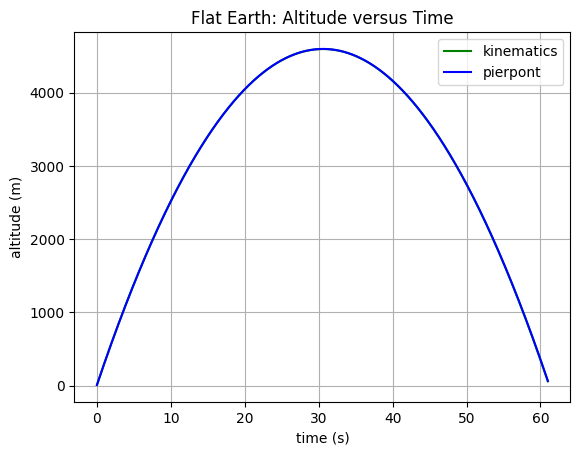

In [3]:
import matplotlib.pyplot as plt

simTime = flatEarthSim.Eom.Metric["time"]
flatAlt = flatEarthSim.Eom.Metric["altitudeMsl_m"]

y = []
for t in simTime:
    y.append(10 + 300*t - 0.5*9.81*t*t)

fig, ck = plt.subplots()
ck.plot( simTime, y, 'g', simTime, flatAlt, 'b')
ck.legend(["kinematics","pierpont"])

ck.set(xlabel='time (s)', ylabel='altitude (m)',
       title='Flat Earth: Altitude versus Time')
ck.grid()

# Stevens and Lewis Orbit

## Oblate Rotating Planet Equations
$\dot{q_0} = -0.5 * (Pq_1 + Qq_2 + Rq_3)$  
$\dot{q_1} = 0.5 * (Pq_0 + Rq_2 - Qq_3)$  
$\dot{q_2} = 0.5 * (Qq_0 - Rq_1 + Pq_3)$  
$\dot{q_3} = 0.5 * (Rq_0 + Qq_1 - Pq_2)$  

$\dot{P_x} = V_x$  
$\dot{P_y} = V_y$  
$\dot{P_z} = V_z$  
where $P$ and $V$ are in the ECEF frame.

$\dot{v_x} = \frac{F_x}{m} + 2 \omega_e V_y + g_x + P_x \omega^2_e$  
$\dot{v_y} = \frac{F_y}{m} - 2 \omega_e V_x + g_y + P_y \omega^2_e$  
$\dot{v_z} = \frac{F_z}{m} + g_z$  
where $\omega_e$ is the rotation rate of Earth.  The terms $g_x$, $g_y$, and $g_z$ are the $J_2$ gravity components in ECEF. This acceleration equation is in the ECEF frame.

$\Gamma \dot{P} = J_{xz} [J_x - J_y + J_z]PQ - [J_z(J_z - J_y) + J^2_{xz}]QR + l J_z + n J_{xz}$  
$J_y \dot{Q} = (J_z - J_x)PR - J_{xz}(P^2 - R^2) + m$  
$\Gamma \dot{R} = [(J_x - J_y)J_x + J^2_{xz}]PQ - J_{xz}[J_x - J_y + J_z]QR + l J_{xz} n J_x$  
where $\Gamma = J_x J_z - J^2_{xz}$  

$\begin{bmatrix}0 \\ \omega^{frd}_{e/i} \end{bmatrix} = q^{-1}_{frd/ecf}\, \ast\, \begin{bmatrix}0 \\ \omega^{ecf}_{e/i} \end{bmatrix}\, \ast \, q_{frd/ecf}$

$\begin{bmatrix}0 \\ \frac{F^{ecf}}{m} \end{bmatrix} = q_{frd/ecf}\, \ast\, \begin{bmatrix}0 \\ \frac{F^{frd}}{m} \end{bmatrix}\, \ast \, q_{ecf/frd}$

In [4]:
%%time
#from pierpont import ppont
#
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "timeStep": [1.0, "s"],
    "altitudeMsl": [100000.0, "m"],
    "trueAirspeed": [9000.0, "m_s"]
}
#
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(20000)

-- OBLATE : EARTH --
++ timeStep = 1.0 [IC case]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 9000.0 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 100000.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0 [default]
++ bodyAngularRate_Pitch = 0 [default]
++ bodyAngularRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Z = 4.88094466281336 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 898 ms, sys: 9.27 ms, total: 908 ms
Wall time: 556 ms


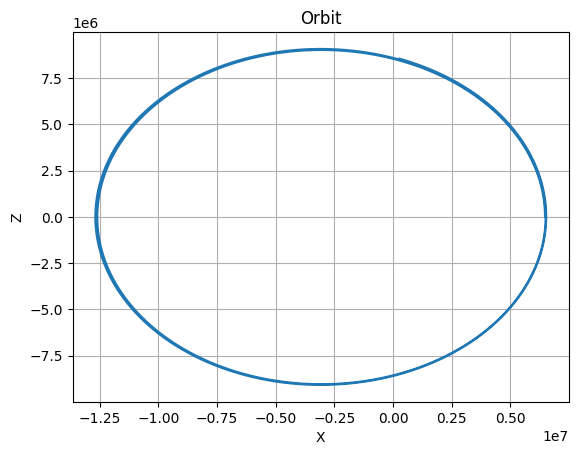

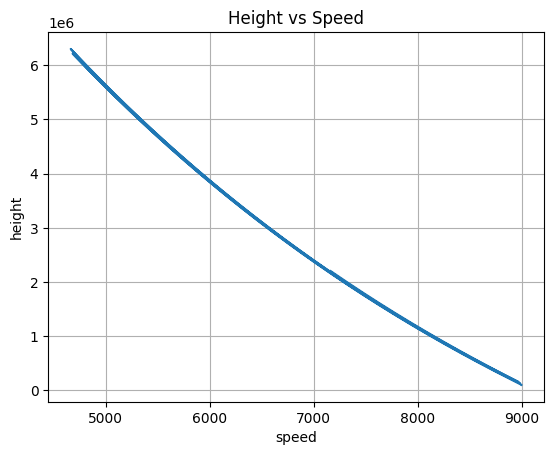

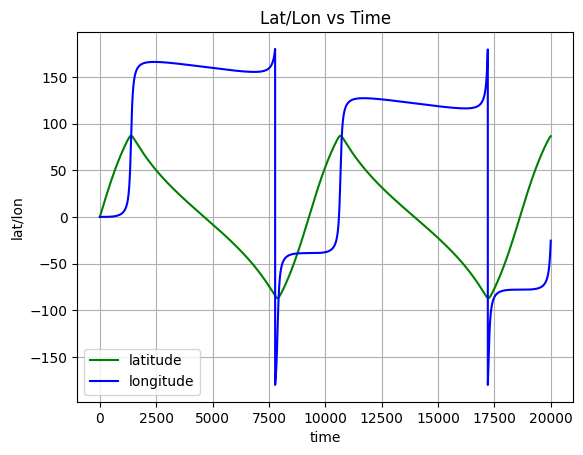

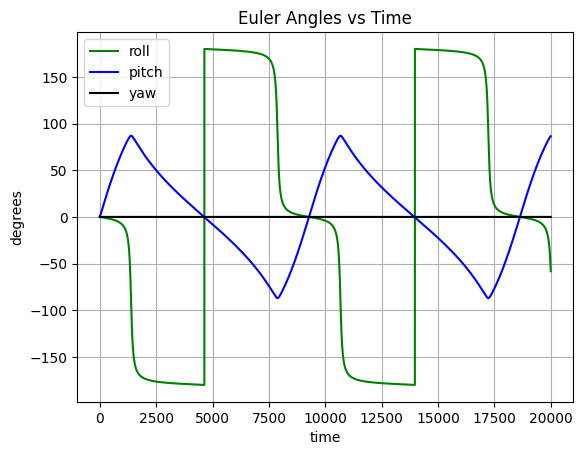

In [5]:
import matplotlib.pyplot as plt
#
gvImperialData = \
{
    'altitudeMsl_ft': ['ft', 'm'], 
    'longitude_deg': ['deg', 'rad'],
    'latitude_deg': ['deg', 'rad'],
    'localGravity_ft_s2': ['ft_s2', 'm_s2'],
    'gePosition_ft_X': ['ft', 'm'], 
    'gePosition_ft_Y': ['ft', 'm'], 
    'gePosition_ft_Z': ['ft', 'm'],
    'eulerAngle_deg_Yaw': ['deg', 'rad'],
    'eulerAngle_deg_Pitch': ['deg', 'rad'],
    'eulerAngle_deg_Roll': ['deg', 'rad'],
    'speedOfSound_ft_s': ['ft_s', 'm_s']
}
#
sim.create_imperial_data(gvImperialData)
#
fig1, a = plt.subplots()
a.plot(sim.Eom.Metric['eiPosition_m_X'], 
       sim.Eom.Metric['eiPosition_m_Z'])
a.set(xlabel='X', ylabel='Z', title='Orbit')
a.grid()

fig2, b = plt.subplots()
b.plot(sim.Eom.Metric['trueAirspeed_m_s'], 
       sim.Eom.Metric['altitudeMsl_m'])
b.set(xlabel='speed', ylabel='height', title='Height vs Speed')
b.grid()

t = sim.Eom.Metric['time']
fig3, c = plt.subplots()
c.plot(t, sim.Imperial['latitude_deg'],'g',
       t, sim.Imperial['longitude_deg'], 'b')
c.legend(["latitude","longitude"])
c.set(xlabel='time', ylabel='lat/lon', title='Lat/Lon vs Time')
c.grid()

fig4, d = plt.subplots()
d.plot(t, sim.Imperial['eulerAngle_deg_Roll'],'g',
       t, sim.Imperial['eulerAngle_deg_Pitch'], 'b',
       t, sim.Imperial['eulerAngle_deg_Yaw'], 'k')
d.legend(["roll","pitch","yaw"])
d.set(xlabel='time', ylabel='degrees', title='Euler Angles vs Time')
d.grid()

In [6]:
from IPython.display import Image
Image(url= "images/SLOrbit.JPG", width=600, height=600)

# 1: Dragless Sphere

In [7]:
%%time
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "altitudeMsl": [30000, "ft"]
}
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0 [default]
++ bodyAngularRate_Pitch = 0 [default]
++ bodyAngularRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Z = 4.88094466281336 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 14 ms, sys: 1.17 ms, total: 15.2 ms
Wall time: 14.6 ms


In [8]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/"
    "Atmos_01_sim_01.csv"
)
gvCC1 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dragless Sphere: Oblate Earth", gvImperialData, 
                       sim, gvCC1)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Sphere: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    0.0205 
longitude_deg             0.0     0.0     0.0    
latitude_deg              0.0     

# 2: Dragless tumbling brick

In [9]:
%%time
#from pierpont import ppont
#
ic = {
    "totalMass": [ 0.155404754, "slug"],
    "bodyMomentOfInertia_X": [0.00189422,"slugft2"],
    "bodyMomentOfInertia_Y": [0.006211019,"slugft2"],
    "bodyMomentOfInertia_Z": [0.007194665,"slugft2"],
    "altitudeMsl": [30000, "ft"],
    "bodyAngularRate_Roll": [10, "deg_s"],
    "bodyAngularRate_Pitch": [20, "deg_s"],
    "bodyAngularRate_Yaw": [30, "deg_s"]
}
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(30.0)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0.17453292519943295 [IC case]
++ bodyAngularRate_Pitch = 0.3490658503988659 [IC case]
++ bodyAngularRate_Yaw = 0.5235987755982988 [IC case]
++ bodyMomentOfInertia_X = 0.002568217499776201 [IC case]
++ bodyMomentOfInertia_Y = 0.008421011121856215 [IC case]
++ bodyMomentOfInertia_Z = 0.009754656036800024 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 8.75 ms, sys: 280 µs, total: 9.03 ms
Wall 

In [10]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_02_TumblingBrickNoDamping/"
    "Atmos_02_sim_01.csv"
)
gvCC2 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dragless Tumbling Brick: Oblate Earth", gvImperialData, 
                       sim, gvCC2)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Tumbling Brick: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    0.0205 
longitude_deg             0.0     0.0     0.0    
latitude_deg              

# 3: Tumbling brick with damping

In [11]:
%%time
from pierpont import ppont
#
class brickSim(ppont.Simulation):
    def set_inputs(self):
        trueAirspeed = self.Planet.trueAirspeed_m_s
        
        inData = {}
        inData["trueAirspeed"] = self.units([trueAirspeed, "m"], "ft")
        inData["bodyAngularRate_Roll"] = self.Eom.X[self.Eom.Pi]
        inData["bodyAngularRate_Pitch"] = self.Eom.X[self.Eom.Qi]
        inData["bodyAngularRate_Yaw"] = self.Eom.X[self.Eom.Ri]
        return inData
    
    def set_outputs(self):
        cl = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Roll")
        cm = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Pitch")
        cn = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Yaw")
        
        self.aeroBodyMomentCoefficient_Roll = cl
        self.aeroBodyMomentCoefficient_Pitch = cm
        self.aeroBodyMomentCoefficient_Yaw = cn
#
ic = {
    "altitudeMsl": [30000, "ft"],
    "bodyAngularRate_Roll": [10, "deg_s"],
    "bodyAngularRate_Pitch": [20, "deg_s"],
    "bodyAngularRate_Yaw": [30, "deg_s"]
}
#
sim = brickSim("oblate:earth")
sim.set_model('models/brick_damping.dml')
sim.reset(ic)
sim.run(30.0)

*******************************************
Model:  Brick Model with Damping
creation date:  2022-12-25
file version:  Initial
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( VRW )  ft_s
++> Input:  bodyAngularRate_Roll ( PB )  rad_s
++> Input:  bodyAngularRate_Pitch ( QB )  rad_s
++> Input:  bodyAngularRate_Yaw ( RB )  rad_s
++> Output:  aeroBodyMomentCoefficient_Roll ( Cl )  nd
++> Output:  aeroBodyMomentCoefficient_Pitch ( Cm )  nd
++> Output:  aeroBodyMomentCoefficient_Yaw ( Cn )  nd
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [DAVE model]
++ referenceWingSpan = 0.101598984 [DAVE model]
++ referenceWingChord = 0.203201016 [DAVE model]
++ referenceWingArea = 0.020644913548800003 [DAVE model]
++ trueAirspeed = 0.0 [DAVE model]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC c

In [12]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_03_TumblingBrickDamping/"
    "Atmos_03_sim_01.csv"
)
gvCC3 = util.get_NESC_data(checkFile)
#
util.print_error_table("Tumbling Brick Damping: Oblate Earth", 
                       gvImperialData, sim, gvCC3)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Tumbling Brick Damping: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.141   0.022   0.0218 
longitude_deg             0.0     0.0     0.0    
latitude_deg              0

In [13]:
import matplotlib.pyplot as plt

def MakePlot(simData, checkData, simCaseLabel):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(checkData['time'], checkData[simCaseLabel],'g', 
             simData.Imperial['time'], simData.Imperial[simCaseLabel], 'b')
    ax1.set(xlabel='time (s)', ylabel=simCaseLabel, title=simCaseLabel)
    ax1.legend(["NESC","pierpont"])

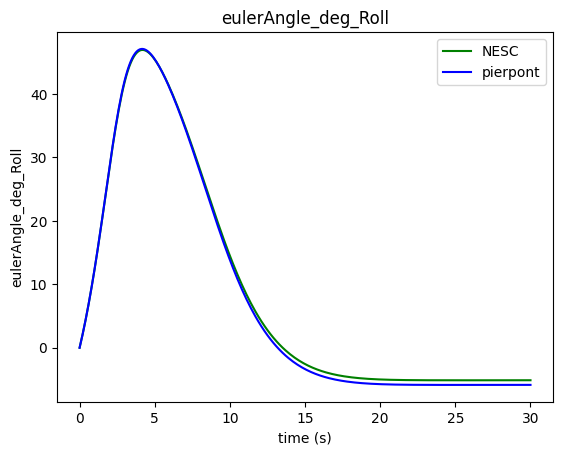

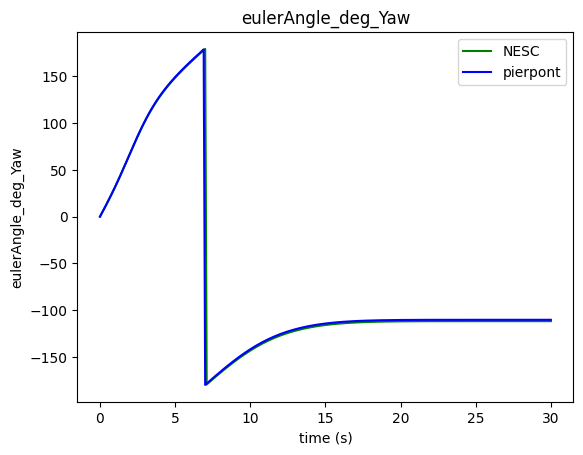

In [14]:
MakePlot(sim, gvCC3, 'eulerAngle_deg_Roll')
MakePlot(sim, gvCC3, 'eulerAngle_deg_Yaw')

# 6: Sphere dropping over rotating, ellipsoidal Earth

In [15]:
%%time
#from pierpont import ppont
#
class ballSim(ppont.Simulation):
    def set_inputs(self):
        inData = {}
        inData["angleOfAttack"] = self.angleOfAttack
        return inData
    
    def set_outputs(self):
        cx = self.DaveModel.DataFromName("aeroBodyForceCoefficient_X")
        cy = self.DaveModel.DataFromName("aeroBodyForceCoefficient_Y")
        cz = self.DaveModel.DataFromName("aeroBodyForceCoefficient_Z")
        
        self.aeroBodyForceCoefficient_X = cx
        self.aeroBodyForceCoefficient_Y = cy
        self.aeroBodyForceCoefficient_Z = cz
        
#
ic = {
    "altitudeMsl": [30000, "ft"]
}
#
bsim = ballSim("oblate:earth")
bsim.set_model('models/sphere_aero.dml')
bsim.reset(ic)
bsim.run(30)

*******************************************
Model:  Example cannonball aerodynamic model
creation date:  2022-12-31
file version:  Inital Version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  angleOfAttack ( alpha )  rad
++> Output:  aeroBodyForceCoefficient_X ( CX )  nd
++> Output:  aeroBodyForceCoefficient_Y ( CY )  nd
++> Output:  aeroBodyForceCoefficient_Z ( CZ )  nd
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DAVE model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DAVE model]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
+

In [16]:
from pierpont import util
#
gvImperialData = \
{
    'altitudeMsl_ft': ['ft', 'm'], 
    'longitude_deg': ['deg', 'rad'],
    'latitude_deg': ['deg', 'rad'],
    'localGravity_ft_s2': ['ft_s2', 'm_s2'],
    'gePosition_ft_X': ['ft', 'm'], 
    'gePosition_ft_Y': ['ft', 'm'], 
    'gePosition_ft_Z': ['ft', 'm'],
    'eulerAngle_deg_Yaw': ['deg', 'rad'],
    'eulerAngle_deg_Pitch': ['deg', 'rad'],
    'eulerAngle_deg_Roll': ['deg', 'rad'],
    'speedOfSound_ft_s': ['ft_s', 'm_s'],
    'trueAirspeed_nmi_h': ['nmi_h', 'm_s'],
    'aero_bodyForce_lbf_X': ['lbf', 'N'],
    'aero_bodyForce_lbf_Y': ['lbf', 'N'],
    'aero_bodyForce_lbf_Z': ['lbf', 'N']
}
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_06_DroppedSphereEllipsoidalNoWind/"
    "Atmos_06_sim_01.csv"
)
gvCC6 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dropped Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC6)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dropped Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            36.133  5.845   5.8453 
longitude_deg             0.0     0.0     0.0    
latitude_deg              

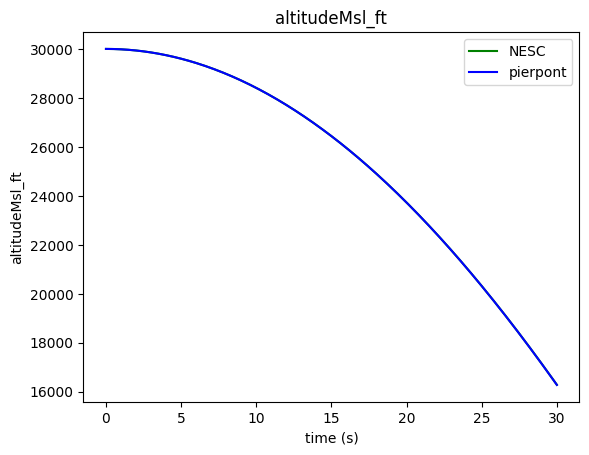

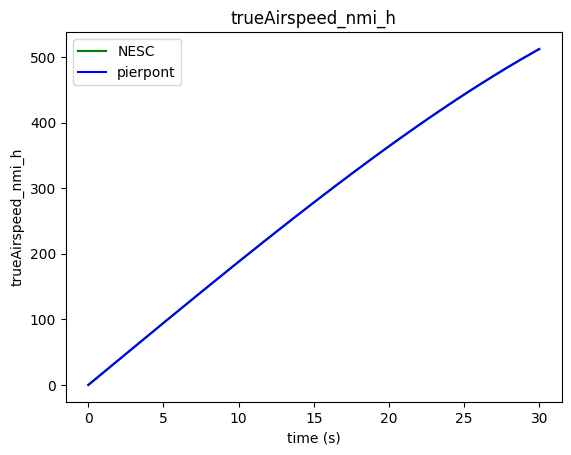

In [17]:
MakePlot(bsim, gvCC6, 'altitudeMsl_ft')
MakePlot(bsim, gvCC6, 'trueAirspeed_nmi_h')

# 9: Eastward firing ballistic sphere

In [18]:
%%time
#from pierpont import ppont
#
# velocity: 0, 1000, -1000
#  1414.21356237
#
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"],
    "eulerAngle_Yaw": [90, "deg"]
}
#
bsim.reset(ic)
bsim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DAVE model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DAVE model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 0 [default]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 1.5707963267948966 [IC case]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0 [default]
++ bodyAngularRate_Pitch = 0 [default]
++ bodyAngularRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [DAVE model]
++ bodyMomentOfInertia_Y = 4.88094466281336 [DAVE model]
++ bodyMomentOfInertia_Z = 4.88094466281336 [DAVE model]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 29.4 ms, sys: 368 µs, total: 29

In [19]:
from pierpont import util
#
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_09_EastwardCannonball/"
    "Atmos_09_sim_01.csv"
)
gvCC9 = util.get_NESC_data(checkFile)
#
util.print_error_table("East fired Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC9)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
East fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            609.793 51.651  51.6513
longitude_deg             0.001   0.0     0.0001 
latitude_deg           

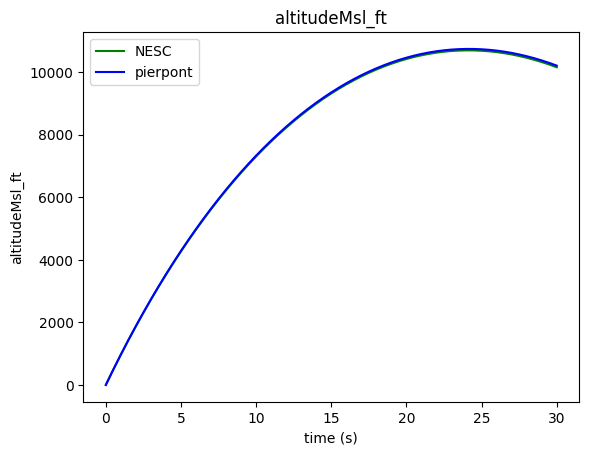

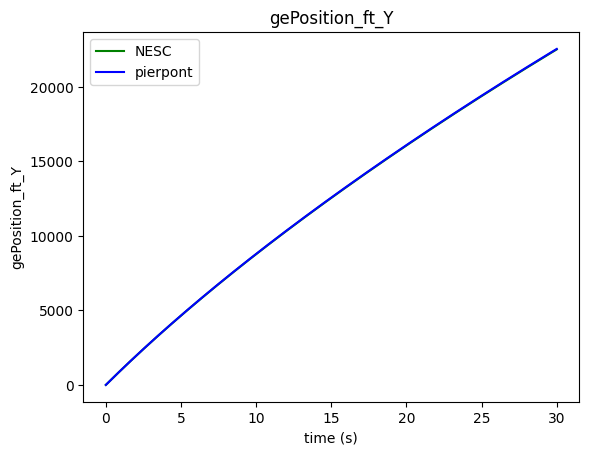

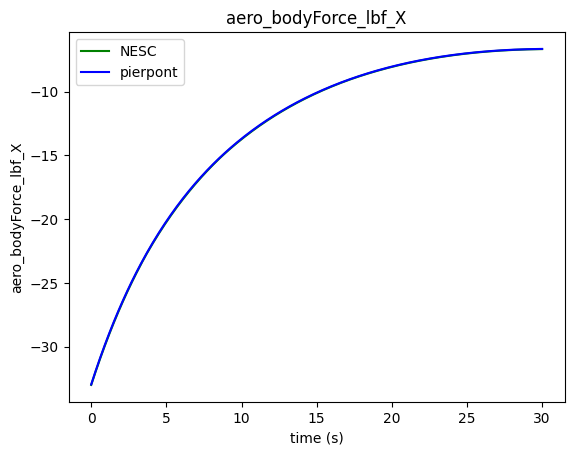

In [20]:
MakePlot(bsim, gvCC9, 'altitudeMsl_ft')
MakePlot(bsim, gvCC9, 'gePosition_ft_Y')
MakePlot(bsim, gvCC9, 'aero_bodyForce_lbf_X')

# 10: Northward firing ballistic sphere

In [21]:
%%time
#from pierpont import ppont
#
# velocity: 1000, 0, -1000
#  1414.21356237
#
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"]
}
#
bsim.reset(ic)
bsim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DAVE model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DAVE model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 0 [default]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ bodyAngularRate_Roll = 0 [default]
++ bodyAngularRate_Pitch = 0 [default]
++ bodyAngularRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [DAVE model]
++ bodyMomentOfInertia_Y = 4.88094466281336 [DAVE model]
++ bodyMomentOfInertia_Z = 4.88094466281336 [DAVE model]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 21.3 ms, sys: 245 µs, total: 21.5 ms
Wall time: 

In [22]:
from pierpont import util
#
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_10_NorthwardCannonball/"
    "Atmos_10_sim_01.csv"
)
gvCC10 = util.get_NESC_data(checkFile)
#
util.print_error_table("North fired Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC10)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
North fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            416.753 33.303  33.3029
longitude_deg             0.001   0.0     0.0001 
latitude_deg          

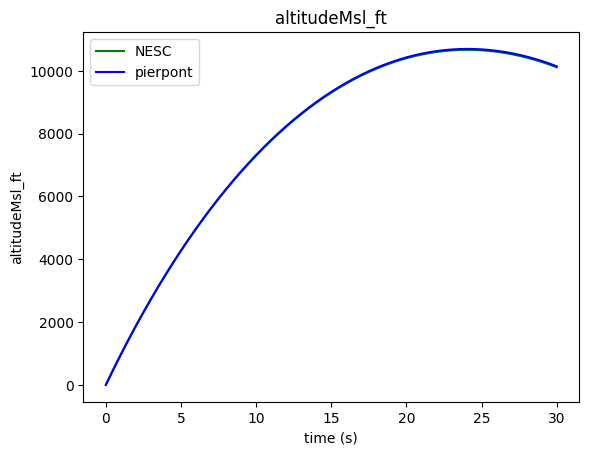

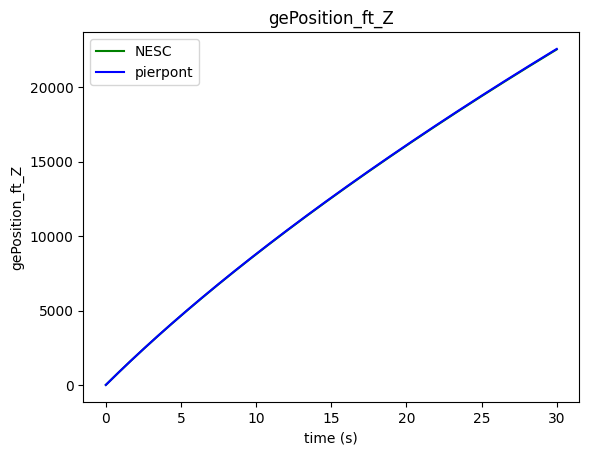

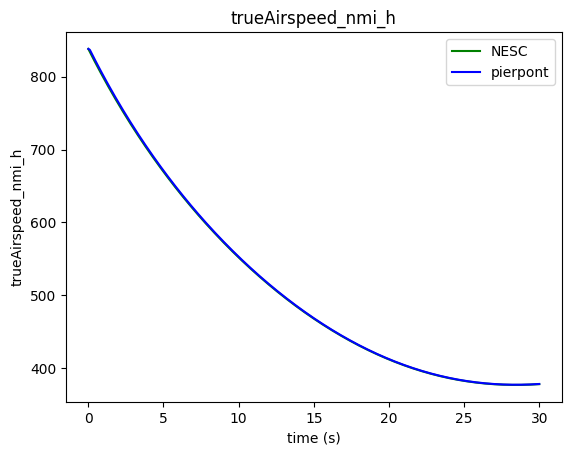

In [23]:
MakePlot(bsim, gvCC10, 'altitudeMsl_ft')
MakePlot(bsim, gvCC10, 'gePosition_ft_Z')
MakePlot(bsim, gvCC10, 'trueAirspeed_nmi_h')

# 11: Steady subsonic flight of F-16

## F-16 model check

In [24]:
from pierpont import daveML

f16Prop = daveML.Model()
f16Prop.LoadDml('models/F16/F16_prop.dml', False)
f16Prop.CheckModel()

*******************************************
Model:  F-16 propulsion model (a la Stevens & Lewis)
creation date:  2012-08-07
file version:  Initial version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  powerLeverAngle ( PWR )  pct
++> Input:  altitudeMSL ( ALT )  ft
++> Input:  mach ( RMACH )  nd
++> Output:  thrustBodyForce_X ( FEX )  lbf
++> Output:  thrustBodyForce_Y ( FEY )  lbf
++> Output:  thrustBodyForce_Z ( FEZ )  lbf
++> Output:  thrustBodyMoment_Roll ( TEL )  ftlbf
++> Output:  thrustBodyMoment_Pitch ( TEM )  ftlbf
++> Output:  thrustBodyMoment_Yaw ( TEN )  ftlbf
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----

----- CheckModel -----

numSignals:  [9, 9, 9, 9, 9, 9, 22, 22, 22]

----- END CheckModel -----



In [25]:
from pierpont import daveML

gvDaveModel = daveML.Model()
gvDaveModel.LoadDml('models/F16/F16_aero.dml', False)
gvDaveModel.CheckModel()

*******************************************
Model:  F-16 Subsonic Aerodynamics Model (a la Garza)
creation date:  2003-06-10
file version:  $ Revision: 396 $
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( vt )  ft_s
++> Input:  angleOfAttack ( alpha )  deg
++> Input:  angleOfSideslip ( beta )  deg
++> Input:  rollBodyRate ( p )  rad_s
++> Input:  pitchBodyRate ( q )  rad_s
++> Input:  yawBodyRate ( r )  rad_s
++> Input:  elevatorDeflection ( el )  deg
++> Input:  aileronDeflection ( ail )  deg
++> Input:  rudderDeflection ( rdr )  deg
++> Input:  XBodyPositionOfCG ( xcg )  nd
++> Output:  aeroBodyForceCoefficient_X ( cx )  nd
++> Output:  aeroBodyForceCoefficient_Y ( cy )  nd
++> Output:  aeroBodyForceCoefficient_Z ( cz )  nd
++> Output:  aeroBodyMomentCoefficient_Roll ( cl )  nd
++> Output:  aeroBodyMomentCoefficient_Pitch ( cm )  nd
++> Output:  aeroBodyMomentCoefficient_Yaw ( cn )  nd
++++++++++++++++++++++++++++++++++++


In [26]:
from pierpont import daveML

gvDaveModel = daveML.Model()
gvDaveModel.LoadDml('models/F16/F16_prop.dml', False)
gvDaveModel.CheckModel()

*******************************************
Model:  F-16 propulsion model (a la Stevens & Lewis)
creation date:  2012-08-07
file version:  Initial version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  powerLeverAngle ( PWR )  pct
++> Input:  altitudeMSL ( ALT )  ft
++> Input:  mach ( RMACH )  nd
++> Output:  thrustBodyForce_X ( FEX )  lbf
++> Output:  thrustBodyForce_Y ( FEY )  lbf
++> Output:  thrustBodyForce_Z ( FEZ )  lbf
++> Output:  thrustBodyMoment_Roll ( TEL )  ftlbf
++> Output:  thrustBodyMoment_Pitch ( TEM )  ftlbf
++> Output:  thrustBodyMoment_Yaw ( TEN )  ftlbf
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----

----- CheckModel -----

numSignals:  [9, 9, 9, 9, 9, 9, 22, 22, 22]

----- END CheckModel -----



## F-16 simulation

In [27]:
%%time
from pierpont import ppont
import math
#
class f16Sim(ppont.Simulation):    
    def set_inputs(self):
        [u, v, w] = self.Eom.body_velocity()
        trueAirspeed = self.Planet.trueAirspeed_m_s
        
        inData = {}
        inData["trueAirspeed"] = self.units([trueAirspeed, "m"], "ft")
        inData["angleOfAttack"] = math.degrees(math.atan2(w, u))
        inData["angleOfSideslip"] = math.degrees(math.atan2(v, u))
        inData["rollBodyRate"] = self.Eom.X[self.Eom.Pi]
        inData["pitchBodyRate"] = self.Eom.X[self.Eom.Qi]
        inData["yawBodyRate"] = self.Eom.X[self.Eom.Ri]
        inData["elevatorDeflection"] = 0
        inData["aileronDeflection"] = 0
        inData["rudderDeflection"] = 0
        inData["XBodyPositionOfCG"] = 0.25
        
        inData["powerLeverAngle"] = 0.2
        inData["altitudeMSL"] = 10013
        inData["mach"] = self.Planet.trueAirspeed_m_s / self.Planet.speedOfSound_m_s
        return inData
#
# 36.01916667, -75.67444444, 10013
ic = {
    "totalMass": [637.26, "slug"],
    "trueAirspeed": [335.15, "kt"],
    "angleOfAttack": [0, "deg"],
    "eulerAngle_Yaw": [45, "deg"],
    "latitude": [36.01916667, "deg"],
    "longitude": [-75.67444444, "deg"],
    "altitudeMsl": [10013, "ft"]
}
#
fsim = f16Sim("oblate:earth")
#fsim.set_engine_model('models/F16/F16_prop.dml')
fsim.set_model('models/F16/F16_aero.dml')
#fsim.set_engine_model('models/F16/F16_prop.dml')
fsim.reset(ic)
#fsim.run(180)
#
#gvOblateRotatingEarth = ppont.slEarthSim('models/F16/F16_aero.dml')
#gvOblateRotatingEarth.Reset(ic)
#gvOblateRotatingEarth.Run(180)

*******************************************
Model:  F-16 Subsonic Aerodynamics Model (a la Garza)
creation date:  2003-06-10
file version:  $ Revision: 396 $
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( vt )  ft_s
++> Input:  angleOfAttack ( alpha )  deg
++> Input:  angleOfSideslip ( beta )  deg
++> Input:  rollBodyRate ( p )  rad_s
++> Input:  pitchBodyRate ( q )  rad_s
++> Input:  yawBodyRate ( r )  rad_s
++> Input:  elevatorDeflection ( el )  deg
++> Input:  aileronDeflection ( ail )  deg
++> Input:  rudderDeflection ( rdr )  deg
++> Input:  XBodyPositionOfCG ( xcg )  nd
++> Output:  aeroBodyForceCoefficient_X ( cx )  nd
++> Output:  aeroBodyForceCoefficient_Y ( cy )  nd
++> Output:  aeroBodyForceCoefficient_Z ( cz )  nd
++> Output:  aeroBodyMomentCoefficient_Roll ( cl )  nd
++> Output:  aeroBodyMomentCoefficient_Pitch ( cm )  nd
++> Output:  aeroBodyMomentCoefficient_Yaw ( cn )  nd
++++++++++++++++++++++++++++++++++++


In [28]:
from pierpont import util
#
#gvOblateRotatingEarth.RecData.CreateImperialData(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_11_TrimCheckSubsonicF16/"
    "Atmos_11_sim_02.csv"
)
gvCC11 = util.get_NESC_data(checkFile)
#

number of headers:  27
['time', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'trueAirspeed_nmi_h']


# 12: GTM

## GTM Model Check

In [29]:
from pierpont import daveML

gvDaveModel = daveML.Model()
gvDaveModel.LoadDml('models/gtm.dml', False)
gvDaveModel.CheckModel()

*******************************************
Model:  GTM Aerodynamic Model
creation date:  2025-04-18
file version:  Version: 001
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed_ft_s ( vt )  ft_s
++> Input:  angleOfAttack_rad ( alpha )  rad
++> Input:  angleOfSideslip_rad ( beta )  rad
++> Input:  bodyAngularRate_rad_s_Roll ( p_rad_s )  rad_s
++> Input:  bodyAngularRate_rad_s_Pitch ( q_rad_s )  rad_s
++> Input:  bodyAngularRate_rad_s_Yaw ( r_rad_s )  rad_s
++> Input:  elevatorDeflection_rad ( el )  rad
++> Input:  aileronDeflection_rad ( ail )  rad
++> Input:  rudderDeflection_rad ( rdr )  rad
++> Input:  throttle ( throttle )  percent [0-1]
++> Output:  dragCoefficient ( CD )  nd
++> Output:  sideForceCoefficient ( CC )  nd
++> Output:  liftCoefficient ( CL )  nd
++> Output:  aeroBodyMomentCoefficient_Roll ( cl )  nd
++> Output:  aeroBodyMomentCoefficient_Pitch ( cm )  nd
++> Output:  aeroBodyMomentCoefficient_Yaw ( cn )  nd
++

## simulation

In [30]:
import unittest
import math

class gtmAeroModel:
    # model inputs
    trueAirspeed_ft_s = 0
    angleOfAttack_rad = 0
    angleOfSideslip_rad = 0
    bodyAngularRate_rad_s_Roll = 0
    bodyAngularRate_rad_s_Pitch = 0
    bodyAngularRate_rad_s_Yaw = 0
    elevatorDeflection_rad = 0
    aileronDeflection_rad = 0
    rudderDeflection_rad = 0
    
    #model outputs
    dragCoefficient = 0
    sideForceCoefficient = 0
    liftCoefficient = 0
    aeroBodyForceCoefficient_X = 0
    aeroBodyForceCoefficient_Y = 0
    aeroBodyForceCoefficient_Z = 0
    aeroBodyMomentCoefficient_Roll = 0
    aeroBodyMomentCoefficient_Pitch = 0
    aeroBodyMomentCoefficient_Yaw = 0
    
    # model constants    
    _constant = {
        'bodyMomentOfInertia_slugft2_X': [1.327, 'slugft2'],
        'bodyMomentOfInertia_slugft2_Y': [4.254, 'slugft2'],
        'bodyMomentOfInertia_slugft2_Z': [5.454, 'slugft2'],
        'bodyProductOfInertia_slugft2_XZ': [0.120, 'slugft2'],
        'referenceWingChord_ft': [0.915, 'ft'],
        'referenceWingSpan_ft': [6.849, 'ft'],
        'referenceWingArea_ft2': [5.902, 'ft2']
    }
    
    referenceWingChord_ft = _constant['referenceWingChord_ft'][0]
    referenceWingSpan_ft = _constant['referenceWingSpan_ft'][0]
    
    _K = [0, 0.019, -0.078, -27.42, 0.293, 3.420, 288.2, -0.040, 1.819, -355.3, -6.563, \
          -1.003, 0.033, 0.952, -0.009, 0.253, \
          0.016, 5.343, 30.78, 0.396, 12.03, 0.506, -36.30, 46.13, \
          -0.109, -0.366, 0.061, -0.079, 0.021, \
          0.182, -1.782, -44.34, -1.785, 374.0, -1748.0, 2.439, 1949.0, -0.038, 0.803, 
          0.183, -0.022, -0.405, -0.009, -0.129, 0.184, -0.377]
    
    def execute(self):
        el  = self.elevatorDeflection_rad
        ail = self.aileronDeflection_rad
        rdr = self.rudderDeflection_rad
        
        alpha  = self.angleOfAttack_rad
        alpha2 = alpha*alpha
        alpha3 = alpha*alpha2
        alpha4 = alpha*alpha3
        
        beta = self.angleOfSideslip_rad
        beta2 = beta*beta
        beta3 = beta*beta2
    
        kSpan = 0.5*self.referenceWingSpan_ft / self.trueAirspeed_ft_s
        kCbar = 0.5*self.referenceWingChord_ft / self.trueAirspeed_ft_s
        
        p_bar = kSpan * self.bodyAngularRate_rad_s_Roll
        q_bar = kCbar * self.bodyAngularRate_rad_s_Pitch
        r_bar = kSpan * self.bodyAngularRate_rad_s_Yaw
        
        self.dragCoefficient = self._K[1] + self._K[2]*alpha + self._K[3]*alpha*q_bar + \
          self._K[4]*alpha*el + self._K[5]*alpha2 + self._K[6]*alpha2*q_bar + \
          self._K[7]*alpha2*el + self._K[8]*alpha3 + self._K[9]*alpha3*q_bar + self._K[10]*alpha4
        
        self.sideForceCoefficient = self._K[11]*beta + self._K[12]*p_bar + self._K[13]*r_bar + \
          self._K[14]*ail + self._K[15]*rdr
        
        self.liftCoefficient = self._K[16] + self._K[17]*alpha + self._K[18]*q_bar + \
          self._K[19]*el + self._K[20]*alpha*q_bar + self._K[21]*alpha2 + \
          self._K[22]*alpha3 + self._K[23]*alpha4
        
        cos_alpha = math.cos(self.angleOfAttack_rad)
        sin_alpha = math.sin(self.angleOfAttack_rad)
        cos_beta = math.cos(self.angleOfSideslip_rad)
        sin_beta = math.sin(self.angleOfSideslip_rad)
        CD = self.dragCoefficient
        CC = self.sideForceCoefficient
        CL = self.liftCoefficient
        
        # transform from wind to body axis for body force coefficients
        self.aeroBodyForceCoefficient_X = -CD*cos_alpha*cos_beta + CC*cos_alpha*sin_beta + CL*sin_alpha
        self.aeroBodyForceCoefficient_Y = -CD*sin_beta - CC*cos_beta
        self.aeroBodyForceCoefficient_Z = -CD*sin_alpha*cos_beta + CC*sin_alpha*sin_beta - CL*cos_alpha
        
        self.aeroBodyMomentCoefficient_Roll = self._K[24]*beta + self._K[25]*p_bar + self._K[26]*r_bar + \
          self._K[27]*ail + self._K[28]*rdr
    
        self.aeroBodyMomentCoefficient_Pitch = self._K[29] + self._K[30]*alpha + self._K[31]*q_bar + \
          self._K[32]*el + self._K[33]*alpha*q_bar + self._K[34]*alpha2*q_bar + self._K[35]*alpha2*el + \
          self._K[36]*alpha3*q_bar + self._K[37]*alpha3*el + self._K[38]*alpha4
        
        self.aeroBodyMomentCoefficient_Yaw = self._K[39]*beta + self._K[40]*p_bar + self._K[41]*r_bar + \
          self._K[42]*ail + self._K[43]*rdr + self._K[44]*beta2 + self._K[45]*beta3

In [31]:
#######
class TestGtmAero(unittest.TestCase):
    
    def setUp(self):
        self.gtm = gtmAeroModel()
        
    def test_Aoa5(self):
        self.gtm.trueAirspeed_ft_s = 125
        self.gtm.angleOfAttack_rad = math.radians(5)
        self.gtm.angleOfSideslip_rad = 0
        self.gtm.bodyAngularRate_rad_s_Roll = 0
        self.gtm.bodyAngularRate_rad_s_Pitch = 0
        self.gtm.bodyAngularRate_rad_s_Yaw = 0
        self.gtm.elevatorDeflection_rad = 0
        self.gtm.aileronDeflection_rad = 0
        self.gtm.rudderDeflection_rad = 0
        self.gtm.execute()
        self.assertAlmostEqual(0.03906624173783407, self.gtm.dragCoefficient)
        self.assertAlmostEqual(0.0, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(0.46466945498070816, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.026537733518097326, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
    def test_AoaN1qN30el8(self):
        self.gtm.trueAirspeed_ft_s = 100
        self.gtm.angleOfAttack_rad = math.radians(-1)
        self.gtm.angleOfSideslip_rad = 0
        self.gtm.bodyAngularRate_rad_s_Roll = 0
        self.gtm.bodyAngularRate_rad_s_Pitch = math.radians(-30)
        self.gtm.bodyAngularRate_rad_s_Yaw = 0
        self.gtm.elevatorDeflection_rad = math.radians(8)
        self.gtm.aileronDeflection_rad = 0
        self.gtm.rudderDeflection_rad = 0
        self.gtm.execute()
        self.assertAlmostEqual(0.019315923758327358, self.gtm.dragCoefficient)
        self.assertAlmostEqual(0.0, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(-0.09483893761826466, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.08712428810688479, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Yaw)
        
    def test_Aoa6elN1(self):
        self.gtm.trueAirspeed_ft_s = 105
        self.gtm.angleOfAttack_rad = math.radians(6)
        self.gtm.angleOfSideslip_rad = 0
        self.gtm.bodyAngularRate_rad_s_Roll = 0
        self.gtm.bodyAngularRate_rad_s_Pitch = 0
        self.gtm.bodyAngularRate_rad_s_Yaw = 0
        self.gtm.elevatorDeflection_rad = math.radians(-1)
        self.gtm.aileronDeflection_rad = 0
        self.gtm.rudderDeflection_rad = 0
        self.gtm.execute()
        self.assertAlmostEqual(0.04910814446171473, self.gtm.dragCoefficient)
        self.assertAlmostEqual(0.0, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(0.5380163501229979, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.026174035722676483, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(0.0, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
    def test_Aoa5beta1pN20rN5rudder2(self):
        self.gtm.trueAirspeed_ft_s = 90
        self.gtm.angleOfAttack_rad = math.radians(5)
        self.gtm.angleOfSideslip_rad = math.radians(1)
        self.gtm.bodyAngularRate_rad_s_Roll = math.radians(-20)
        self.gtm.bodyAngularRate_rad_s_Pitch = 0
        self.gtm.bodyAngularRate_rad_s_Yaw = math.radians(-5)
        self.gtm.elevatorDeflection_rad = 0
        self.gtm.aileronDeflection_rad = 0
        self.gtm.rudderDeflection_rad = math.radians(2)
        self.gtm.execute()
        self.assertAlmostEqual(0.03906624173783407, self.gtm.dragCoefficient)
        self.assertAlmostEqual(-0.012273696352092241, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(0.46466945498070816, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.0034892753305564538, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.026537733518097326, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(0.0003820493453869821, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
    def test_RollCheck(self):
        self.gtm.trueAirspeed_ft_s = 110
        self.gtm.angleOfAttack_rad = math.radians(3)
        self.gtm.angleOfSideslip_rad = math.radians(-1)
        self.gtm.bodyAngularRate_rad_s_Roll = math.radians(-5)
        self.gtm.bodyAngularRate_rad_s_Pitch = 0
        self.gtm.bodyAngularRate_rad_s_Yaw = 0
        self.gtm.elevatorDeflection_rad = 0
        self.gtm.aileronDeflection_rad = math.radians(2)
        self.gtm.rudderDeflection_rad = 0
        self.gtm.execute()
        self.assertAlmostEqual(0.02450383838973481, self.gtm.dragCoefficient)
        self.assertAlmostEqual(0.017101839931792328, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(0.2922819957201287, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.00013912416133385905, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.08870073364363779, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(-0.0033902890415291056, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
    def test_RudderCheck(self):
        self.gtm.trueAirspeed_ft_s = 120
        self.gtm.angleOfAttack_rad = math.radians(-3)
        self.gtm.angleOfSideslip_rad = math.radians(2)
        self.gtm.bodyAngularRate_rad_s_Roll = 0
        self.gtm.bodyAngularRate_rad_s_Pitch = 0
        self.gtm.bodyAngularRate_rad_s_Yaw = math.radians(6)
        self.gtm.elevatorDeflection_rad = 0
        self.gtm.aileronDeflection_rad = 0
        self.gtm.rudderDeflection_rad = math.radians(3)
        self.gtm.execute()
        self.assertAlmostEqual(0.03214975320312878, self.gtm.dragCoefficient)
        self.assertAlmostEqual(-0.018919260881204904, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(-0.2568141017777794, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(-0.002522965499875846, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.27531133726687146, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(-0.001368673722738917, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
    def test_AllNonZero(self):
        self.gtm.trueAirspeed_ft_s = 113
        self.gtm.angleOfAttack_rad = math.radians(4)
        self.gtm.angleOfSideslip_rad = math.radians(2)
        self.gtm.bodyAngularRate_rad_s_Roll = math.radians(1.5)
        self.gtm.bodyAngularRate_rad_s_Pitch = math.radians(-2)
        self.gtm.bodyAngularRate_rad_s_Yaw = math.radians(5)
        self.gtm.elevatorDeflection_rad = math.radians(-8)
        self.gtm.aileronDeflection_rad = math.radians(3)
        self.gtm.rudderDeflection_rad = math.radians(-2)
        self.gtm.execute()
        self.assertAlmostEqual(0.027946506902627483, self.gtm.dragCoefficient)
        self.assertAlmostEqual(-0.0417700332061179, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(0.32046156597007863, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(-0.008803344676723581, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.30887368307931345, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(0.009539246596656876, self.gtm.aeroBodyMomentCoefficient_Yaw) 
 
    def test_AllNonZero2(self):
        self.gtm.trueAirspeed_ft_s = 125
        self.gtm.angleOfAttack_rad = math.radians(-4)
        self.gtm.angleOfSideslip_rad = math.radians(-2)
        self.gtm.bodyAngularRate_rad_s_Roll = math.radians(-1.5)
        self.gtm.bodyAngularRate_rad_s_Pitch = math.radians(2)
        self.gtm.bodyAngularRate_rad_s_Yaw = math.radians(-5)
        self.gtm.elevatorDeflection_rad = math.radians(8)
        self.gtm.aileronDeflection_rad = math.radians(-3)
        self.gtm.rudderDeflection_rad = math.radians(2)
        self.gtm.execute()
        self.assertAlmostEqual(0.037895407341170875, self.gtm.dragCoefficient)
        self.assertAlmostEqual(0.042014245350311646, self.gtm.sideForceCoefficient)
        self.assertAlmostEqual(-0.2819811824426986, self.gtm.liftCoefficient) 
        self.assertAlmostEqual(0.008790955080469651, self.gtm.aeroBodyMomentCoefficient_Roll) 
        self.assertAlmostEqual(0.04868098537196699, self.gtm.aeroBodyMomentCoefficient_Pitch) 
        self.assertAlmostEqual(-0.009195348890347997, self.gtm.aeroBodyMomentCoefficient_Yaw) 
        
#unittest.main(argv=[''], verbosity=2, exit=False)

In [32]:
class gtmEngineModel:
    # model inputs
    throttle = 0
    
    # model property
    maxThrust_lbf = 25.0
    
    # model outputs
    thrustBodyForce_lbf_X = 0
    
    def execute(self):
        self.thrustBodyForce_lbf_X = self.throttle * self.maxThrust_lbf

In [33]:
import unittest

#######
class TestGtmEngine(unittest.TestCase):
    
    def setUp(self):
        self.gtm = gtmEngineModel()
        
    def test_FullThrottle(self):
        self.gtm.throttle = 1
        self.gtm.execute()
        self.assertAlmostEqual(25.0, self.gtm.thrustBodyForce_lbf_X)
        
    def test_HalfThrottle(self):
        self.gtm.throttle = 0.5
        self.gtm.execute()
        self.assertAlmostEqual(12.5, self.gtm.thrustBodyForce_lbf_X)

unittest.main(argv=[''], verbosity=2, exit=False)

test_Deg_sToRad_s (__main__.TestConvert.test_Deg_sToRad_s) ... ok
test_DegreeToRadian (__main__.TestConvert.test_DegreeToRadian) ... ok
test_Feet2ToMeter2 (__main__.TestConvert.test_Feet2ToMeter2) ... ok
test_FeetToMeter (__main__.TestConvert.test_FeetToMeter) ... ok
test_FeetToNm (__main__.TestConvert.test_FeetToNm) ... ok
test_FpsToKnot (__main__.TestConvert.test_FpsToKnot) ... ok
test_KgToSlug (__main__.TestConvert.test_KgToSlug) ... ok
test_Kgm2ToSlugft2 (__main__.TestConvert.test_Kgm2ToSlugft2) ... ok
test_KmTom (__main__.TestConvert.test_KmTom) ... ok
test_Km_sTom_s (__main__.TestConvert.test_Km_sTom_s) ... ok
test_KnotToFps (__main__.TestConvert.test_KnotToFps) ... ok
test_KnotToMps (__main__.TestConvert.test_KnotToMps) ... ok
test_LbfToNewton (__main__.TestConvert.test_LbfToNewton) ... ok
test_Meter2ToFeet2 (__main__.TestConvert.test_Meter2ToFeet2) ... ok
test_MeterToFeet (__main__.TestConvert.test_MeterToFeet) ... ok
test_MinToSec (__main__.TestConvert.test_MinToSec) ... ok
te

In [34]:
%%time
from pierpont import ppont
import math
#
class gtmSim(ppont.Simulation):
    aeroModel = gtmAeroModel()
    engineModel = gtmEngineModel()
    
    elevator_deg = 0
    throttle = 0
    
    def run_python_model(self):
        # aero model
        vt = self.units([self.Eom.Planet.trueAirspeed_m_s, "m_s"], "ft_s")
        alpha = self.angleOfAttack
        beta = self.angleOfSideslip
        
        p = self.Eom.X[self.Eom.Pi]
        q = self.Eom.X[self.Eom.Qi]
        r = self.Eom.X[self.Eom.Ri]
        
        el = 0
        ail = 0
        rdr = 0
        
        # control surface doublets
        time = self.Eom.time_s
        if (time > 0.99) and (time < 2.0):
            el = math.radians(-10.0)
        if (time > 1.99) and (time < 3.0):
            el = math.radians(10.0)
            
        if (time > 4.99) and (time < 6.0):
            ail = math.radians(-10.0)
        if (time > 5.99) and (time < 7.0):
            ail = math.radians(10.0)
            
        if (time > 8.99) and (time < 10.0):
            rdr = math.radians(-5.0)
        if (time > 9.99) and (time < 11.0):
            rdr = math.radians(5.0)
            
        self.Eom.record_data('el', math.degrees(el))
        self.Eom.record_data('ail', math.degrees(ail))
        self.Eom.record_data('rdr', math.degrees(rdr))
        
        # set the model inputs
        self.aeroModel.trueAirspeed_ft_s = vt
        self.aeroModel.angleOfAttack_rad = alpha
        self.aeroModel.angleOfSideslip_rad = beta 
        self.aeroModel.bodyAngularRate_rad_s_Roll = p
        self.aeroModel.bodyAngularRate_rad_s_Pitch = q
        self.aeroModel.bodyAngularRate_rad_s_Yaw = r
        self.aeroModel.elevatorDeflection_rad = el
        self.aeroModel.aileronDeflection_rad = ail
        self.aeroModel.rudderDeflection_rad = rdr
        
        # run the model
        self.aeroModel.execute()
        
        # set the outputs        
        self.Eom.record_data('dragCoefficient', self.aeroModel.dragCoefficient)
        self.Eom.record_data('sideForceCoefficient', self.aeroModel.sideForceCoefficient)
        self.Eom.record_data('liftCoefficient', self.aeroModel.liftCoefficient)
        
        self.aeroBodyForceCoefficient_X = self.aeroModel.aeroBodyForceCoefficient_X
        self.aeroBodyForceCoefficient_Y = self.aeroModel.aeroBodyForceCoefficient_Y
        self.aeroBodyForceCoefficient_Z = self.aeroModel.aeroBodyForceCoefficient_Z
        
        self.aeroBodyMomentCoefficient_Roll = self.aeroModel.aeroBodyMomentCoefficient_Roll
        self.aeroBodyMomentCoefficient_Pitch = self.aeroModel.aeroBodyMomentCoefficient_Pitch
        self.aeroBodyMomentCoefficient_Yaw = self.aeroModel.aeroBodyMomentCoefficient_Yaw
        
        # engine model
        self.engineModel.throttle = 0.15
        self.engineModel.execute()
        self.thrustBodyForce_X = self.to_si([self.engineModel.thrustBodyForce_lbf_X, "lbf"])
        
        '''
        print("aoa: ", math.degrees(alpha), math.degrees(self.angleOfAttack))
        print("beta: ", math.degrees(beta), math.degrees(self.angleOfSideslip))
        print("speed: ", vt, " <========================")
        altitude = self.Eom.Planet.altitudeMsl_m
        print("alt: ", altitude)
        print("el: ", self.elevator_deg)
        print("tp: ", self.throttle)
        '''
        
    def trim(self):
        tol = 0.001
        maxSteps = 50
        minElevator_deg = -20
        Tmax_lbf = 25.0
        # L = qS Cz = W cos(pitch)
        # Cz(alpha, qtilde, el) = Wcos(theta) / qS
        #   range of el is -20 degrees to 10 degrees
        
        trueAirspeed = self.Eom.Planet.trueAirspeed_m_s
        altitude = self.Eom.Planet.altitudeMsl_m
        dynamicPressure = self.Eom.Planet.dynamic_pressure(altitude, trueAirspeed)
        qS = dynamicPressure * self.referenceWingArea
        
        alpha = self.angleOfAttack
        
        inData = {}
        inData["trueAirspeed_ft_s"] = self.units([trueAirspeed, "m_s"], "ft_s")
        inData["angleOfAttack_rad"] = alpha
        inData["angleOfSideslip_rad"] = self.angleOfSideslip
        inData["bodyAngularRate_rad_s_Roll"] = 0
        inData["bodyAngularRate_rad_s_Pitch"] = 0
        inData["bodyAngularRate_rad_s_Yaw"] = 0
        inData["aileronDeflection_rad"] = 0
        inData["rudderDeflection_rad"] = 0
        inData["throttle"] = 0.0
        
        W = self.Eom.totalMass_kg * self.Eom.Planet.gravity_constant_m_s2
        Wf = W * math.cos( alpha ) / qS
        print('vt=', trueAirspeed)
        print('Wcos(theta) / qS =', Wf)
        step = 1
        el = minElevator_deg
        incr = 1
        intervalFound = False
        while step < maxSteps:
            inData["elevatorDeflection_rad"] = math.radians(el)
            self.Model.Update(inData)
            cz = self.Model.DataFromName("aeroBodyForceCoefficient_Z")
            R = abs(cz - Wf)
            print(step, ' el=', el, ' cz=', cz, ' R=', R)
            
            if R < tol:
                print(f'trim achieved in {step} steps')
                break
                
            if cz > Wf:
                intervalFound = True
                
            if intervalFound:
                incr = 0.5*incr
                if cz > Wf:
                    el -= incr
                else:
                    el += incr
            else:
                el += incr
                    
            step = step + 1
        else:
            print(f'max iterations ({maxSteps}) exceeded')
            
        self.elevator_deg = el
        
        # T = D + Wsin(pitch) -> T = throttle * Tmax
        # throttle * Tmax = qS * Cx(alpha, qtilde, el) + Wsin(pitch)
        # throttle = (qS * Cx(alpha, qtilde, el) + Wsin(pitch) / Tmax
        
        cx = self.Model.DataFromName("aeroBodyForceCoefficient_X")
        D = qS * cx
        Tmax = self.to_si([Tmax_lbf,"lbf"])
        self.throttle = (D + W * math.sin( alpha ) ) / Tmax
        #self.throttle = 5.0
        print('trim throttle: ', round(self.throttle,3), ' drag: ', D, ' Wsin(aoa): ', \
              W * math.sin( alpha ), ' thrust: ', self.throttle*Tmax)
        
        # now Cmo is self.Model.DataFromName("aeroBodyMomentCoefficient_Pitch")
        cmo = self.Model.DataFromName("aeroBodyMomentCoefficient_Pitch")
        print('cmo:', cmo)
#
ic = {
    "timeStep": [0.01, "s"],
    "totalMass": [ 22.498182, "kg"],
    "altitudeMsl": [1200, "ft"],
    "trueAirspeed": [125, "ft_s"],
    "angleOfAttack": [5.0, "deg"],
    "angleOfSideslip": [0.0, "deg"],
    "eulerAngle_Pitch": [0.0, "deg"],
    "bodyAngularRate_Roll": [0, "deg_s"],
    "bodyAngularRate_Pitch": [0, "deg_s"],
    "bodyAngularRate_Yaw": [0, "deg_s"],
    "bodyMomentOfInertia_X": [1.327, 'slugft2'],
    "bodyMomentOfInertia_Y": [4.254, 'slugft2'],
    "bodyMomentOfInertia_Z": [5.454, 'slugft2'],
    "bodyProductOfInertia_XZ": [0.120, 'slugft2'],
    "referenceWingChord": [0.915, 'ft'],
    "referenceWingSpan": [6.849, 'ft'],
    "referenceWingArea": [5.902, 'ft2']
}
#
#gsim = gtmSim("oblate:earth")
gsim = gtmSim("flat:earth")
gsim.set_python_model(True)
gsim.reset(ic)
#gsim.trim()
gsim.run(15)

-- FLAT : EARTH --
++ timeStep = 0.01 [IC case]
++ totalMass = 22.498182 [IC case]
++ referenceWingSpan = 2.0875752000000003 [IC case]
++ referenceWingChord = 0.27889200000000003 [IC case]
++ referenceWingArea = 0.5483137420800002 [IC case]
++ trueAirspeed = 38.1 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 365.76 [IC case]
++ fePosition_m_X = 0 [default]
++ fePosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0.0 [IC case]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0.08726646259971647 [IC case]
++ angleOfSideslip = 0.0 [IC case]
++ bodyAngularRate_Roll = 0.0 [IC case]
++ bodyAngularRate_Pitch = 0.0 [IC case]
++ bodyAngularRate_Yaw = 0.0 [IC case]
++ bodyMomentOfInertia_X = 1.7991704354314801 [IC case]
++ bodyMomentOfInertia_Y = 5.76764960989112 [IC case]
++ bodyMomentOfInertia_Z = 7.394631164162241 [IC case]
++ bodyProductOfInertia_XZ = 0.162698155427112 [IC case]
======done=======
CPU times: user 40.1 ms, sys: 

## old simulation

In [35]:
%%time
from pierpont import ppont
import math
#
class gtmSim(ppont.Simulation):
    elevator_deg = 0
    throttle = 0
    
    def set_inputs(self):
        alpha = self.angleOfAttack
        beta = self.angleOfSideslip
        vt = self.units([self.Eom.Planet.trueAirspeed_m_s, "m_s"], "ft_s")
        
        p = self.Eom.X[self.Eom.Pi]
        q = self.Eom.X[self.Eom.Qi]
        r = self.Eom.X[self.Eom.Ri]
        
        el = 0
        ail = 0
        rdr = 0
        
        time = self.Eom.time_s
        if (time > 0.99) and (time < 2.0):
            el = math.radians(-10.0)
        if (time > 1.99) and (time < 3.0):
            el = math.radians(10.0)
            
        if (time > 4.99) and (time < 6.0):
            ail = math.radians(-10.0)
        if (time > 5.99) and (time < 7.0):
            ail = math.radians(10.0)
            
        if (time > 8.99) and (time < 10.0):
            rdr = math.radians(-5.0)
        if (time > 9.99) and (time < 11.0):
            rdr = math.radians(5.0)
            
        self.Eom.record_data('el', math.degrees(el))
        self.Eom.record_data('ail', math.degrees(ail))
        self.Eom.record_data('rdr', math.degrees(rdr))
        
        inData = {}
        inData["trueAirspeed_ft_s"] = vt
        inData["angleOfAttack_rad"] = alpha
        inData["angleOfSideslip_rad"] = beta
        inData["bodyAngularRate_rad_s_Roll"] = p
        inData["bodyAngularRate_rad_s_Pitch"] = q
        inData["bodyAngularRate_rad_s_Yaw"] = r
        inData["elevatorDeflection_rad"] = el
        inData["aileronDeflection_rad"] = ail
        inData["rudderDeflection_rad"] = rdr
        inData["throttle"] = 0.15
        
        '''
        print("aoa: ", math.degrees(alpha), math.degrees(self.angleOfAttack))
        print("beta: ", math.degrees(beta), math.degrees(self.angleOfSideslip))
        print("speed: ", vt, " <========================")
        altitude = self.Eom.Planet.altitudeMsl_m
        print("alt: ", altitude)
        print("el: ", self.elevator_deg)
        print("tp: ", self.throttle)
        '''
        
        
        return inData
    
    def set_outputs(self):
        CD = self.DaveModel.DataFromName("dragCoefficient")
        CC = self.DaveModel.DataFromName("sideForceCoefficient")
        CL = self.DaveModel.DataFromName("liftCoefficient")
        
        self.Eom.record_data('dragCoefficient', CD)
        self.Eom.record_data('sideForceCoefficient', CC)
        self.Eom.record_data('liftCoefficient', CL)
        
        cl = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Roll")
        cm = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Pitch")
        cn = self.DaveModel.DataFromName("aeroBodyMomentCoefficient_Yaw")
        
        efx = self.to_si([self.DaveModel.DataFromName("thrustBodyForce_X"), "lbf"])
        
        cos_alpha = math.cos(self.angleOfAttack)
        sin_alpha = math.sin(self.angleOfAttack)
        cos_beta = math.cos(self.angleOfSideslip)
        sin_beta = math.sin(self.angleOfSideslip)

        # put this transformation in the model
        cx = -CD*cos_alpha*cos_beta + CC*cos_alpha*sin_beta + CL*sin_alpha
        cy = -CD*sin_beta - CC*cos_beta
        cz = -CD*sin_alpha*cos_beta + CC*sin_alpha*sin_beta - CL*cos_alpha
        
        self.aeroBodyForceCoefficient_X = cx
        self.aeroBodyForceCoefficient_Y = cy
        self.aeroBodyForceCoefficient_Z = cz
        
        self.aeroBodyMomentCoefficient_Roll = cl
        self.aeroBodyMomentCoefficient_Pitch = cm
        self.aeroBodyMomentCoefficient_Yaw = cn
        
        self.thrustBodyForce_X = efx
        self.thrustBodyForce_Y = 0
        self.thrustBodyForce_Z = 0
        
        '''
        print("=.=.=.=.=.=.=.=.=.=.=.=.=.=")
        print("cx: ", cx)
        print("cy: ", cy)
        print("cz: ", cz)
        print("CD: ", CD)
        print("CC: ", CC)
        print("CL: ", CL)
        print("cl: ", cl)
        print("cm: ", cm)
        print("cn: ", cn)
        print("xf: ", efx)
        print("=.=.=.=.=.=.=.=.=.=.=.=.=.=")
        '''
        
    def trim(self):
        tol = 0.001
        maxSteps = 50
        minElevator_deg = -20
        Tmax_lbf = 25.0
        # L = qS Cz = W cos(pitch)
        # Cz(alpha, qtilde, el) = Wcos(theta) / qS
        #   range of el is -20 degrees to 10 degrees
        
        trueAirspeed = self.Eom.Planet.trueAirspeed_m_s
        altitude = self.Eom.Planet.altitudeMsl_m
        dynamicPressure = self.Eom.Planet.dynamic_pressure(altitude, trueAirspeed)
        qS = dynamicPressure * self.referenceWingArea
        
        alpha = self.angleOfAttack
        
        inData = {}
        inData["trueAirspeed_ft_s"] = self.units([trueAirspeed, "m_s"], "ft_s")
        inData["angleOfAttack_rad"] = alpha
        inData["angleOfSideslip_rad"] = self.angleOfSideslip
        inData["bodyAngularRate_rad_s_Roll"] = 0
        inData["bodyAngularRate_rad_s_Pitch"] = 0
        inData["bodyAngularRate_rad_s_Yaw"] = 0
        inData["aileronDeflection_rad"] = 0
        inData["rudderDeflection_rad"] = 0
        inData["throttle"] = 0.0
        
        W = self.Eom.totalMass_kg * self.Eom.Planet.gravity_constant_m_s2
        Wf = W * math.cos( alpha ) / qS
        print('vt=', trueAirspeed)
        print('Wcos(theta) / qS =', Wf)
        step = 1
        el = minElevator_deg
        incr = 1
        intervalFound = False
        while step < maxSteps:
            inData["elevatorDeflection_rad"] = math.radians(el)
            self.Model.Update(inData)
            cz = self.Model.DataFromName("aeroBodyForceCoefficient_Z")
            R = abs(cz - Wf)
            print(step, ' el=', el, ' cz=', cz, ' R=', R)
            
            if R < tol:
                print(f'trim achieved in {step} steps')
                break
                
            if cz > Wf:
                intervalFound = True
                
            if intervalFound:
                incr = 0.5*incr
                if cz > Wf:
                    el -= incr
                else:
                    el += incr
            else:
                el += incr
                    
            step = step + 1
        else:
            print(f'max iterations ({maxSteps}) exceeded')
            
        self.elevator_deg = el
        
        # T = D + Wsin(pitch) -> T = throttle * Tmax
        # throttle * Tmax = qS * Cx(alpha, qtilde, el) + Wsin(pitch)
        # throttle = (qS * Cx(alpha, qtilde, el) + Wsin(pitch) / Tmax
        
        cx = self.Model.DataFromName("aeroBodyForceCoefficient_X")
        D = qS * cx
        Tmax = self.to_si([Tmax_lbf,"lbf"])
        self.throttle = (D + W * math.sin( alpha ) ) / Tmax
        #self.throttle = 5.0
        print('trim throttle: ', round(self.throttle,3), ' drag: ', D, ' Wsin(aoa): ', \
              W * math.sin( alpha ), ' thrust: ', self.throttle*Tmax)
        
        # now Cmo is self.Model.DataFromName("aeroBodyMomentCoefficient_Pitch")
        cmo = self.Model.DataFromName("aeroBodyMomentCoefficient_Pitch")
        print('cmo:', cmo)
#
ic = {
    "timeStep": [0.01, "s"],
    "totalMass": [ 22.498182, "kg"],
    "altitudeMsl": [1200, "ft"],
    "trueAirspeed": [125, "ft_s"],
    "angleOfAttack": [5.0, "deg"],
    "angleOfSideslip": [0.0, "deg"],
    "eulerAngle_Pitch": [0.0, "deg"],
    "bodyAngularRate_Roll": [0, "deg_s"],
    "bodyAngularRate_Pitch": [0, "deg_s"],
    "bodyAngularRate_Yaw": [0, "deg_s"]
}
#
#gsim = gtmSim("oblate:earth")
gsim = gtmSim("flat:earth")
gsim.set_model('models/gtm.dml')
gsim.reset(ic)
#gsim.trim()
gsim.run(15)

*******************************************
Model:  GTM Aerodynamic Model
creation date:  2025-04-18
file version:  Version: 001
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed_ft_s ( vt )  ft_s
++> Input:  angleOfAttack_rad ( alpha )  rad
++> Input:  angleOfSideslip_rad ( beta )  rad
++> Input:  bodyAngularRate_rad_s_Roll ( p_rad_s )  rad_s
++> Input:  bodyAngularRate_rad_s_Pitch ( q_rad_s )  rad_s
++> Input:  bodyAngularRate_rad_s_Yaw ( r_rad_s )  rad_s
++> Input:  elevatorDeflection_rad ( el )  rad
++> Input:  aileronDeflection_rad ( ail )  rad
++> Input:  rudderDeflection_rad ( rdr )  rad
++> Input:  throttle ( throttle )  percent [0-1]
++> Output:  dragCoefficient ( CD )  nd
++> Output:  sideForceCoefficient ( CC )  nd
++> Output:  liftCoefficient ( CL )  nd
++> Output:  aeroBodyMomentCoefficient_Roll ( cl )  nd
++> Output:  aeroBodyMomentCoefficient_Pitch ( cm )  nd
++> Output:  aeroBodyMomentCoefficient_Yaw ( cn )  nd
++

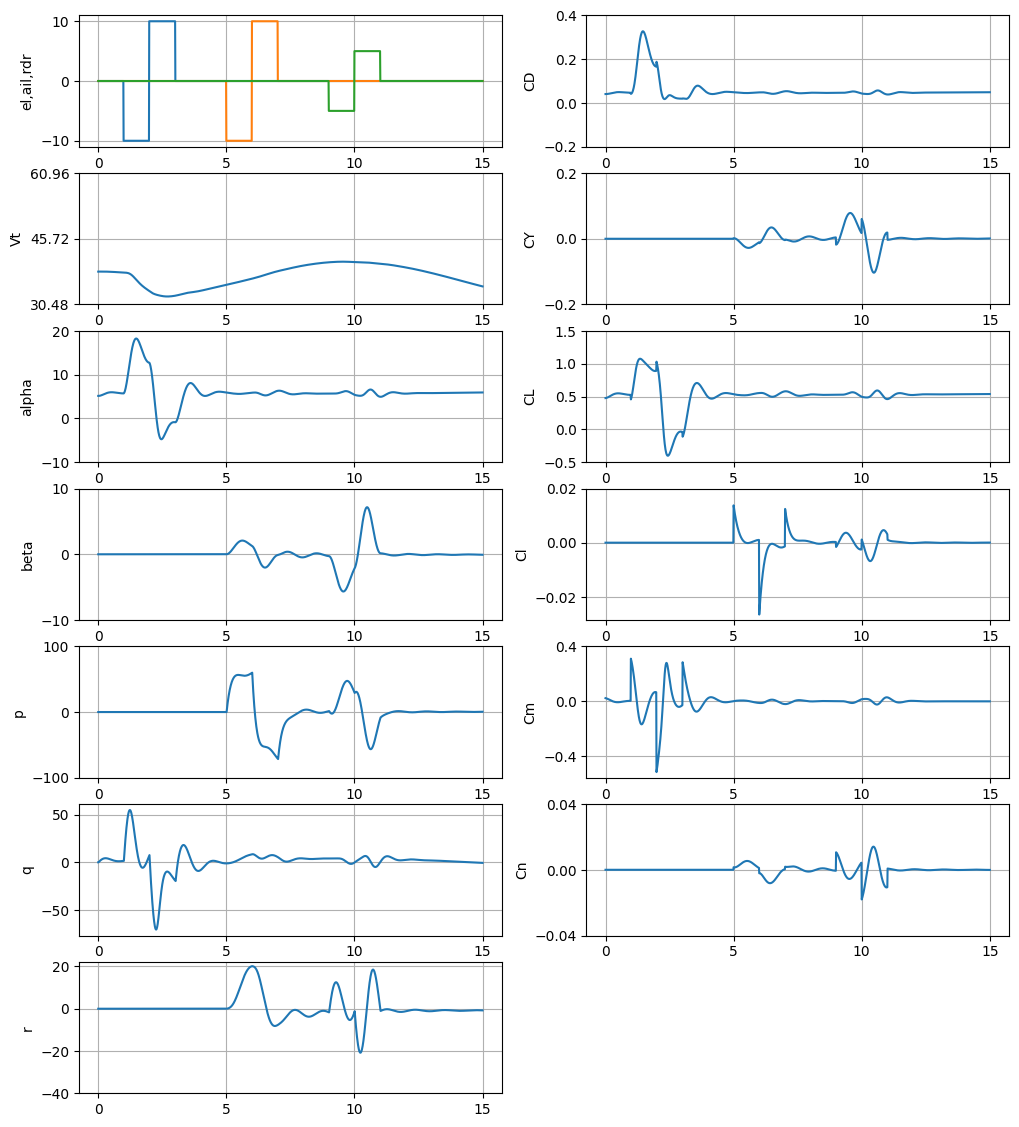

In [36]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(2,1)
plt.figure(figsize=(12,14))

rows = 7

plt.subplot(rows,2,1)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['el'],
        gsim.Eom.Metric['time'], gsim.Eom.Metric['ail'],
        gsim.Eom.Metric['time'], gsim.Eom.Metric['rdr'])
plt.xticks([0,5,10,15])
plt.yticks([-10, 0, 10])
plt.ylabel('el,ail,rdr')
plt.grid(True)

plt.subplot(rows,2,2)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['dragCoefficient'])
plt.xticks([0,5,10,15])
plt.yticks([-0.2,0,0.2,0.4])
plt.ylabel('CD')
plt.grid(True)

plt.subplot(rows,2,3)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['trueAirspeed_m_s'])
plt.xticks([0,5,10,15])
plt.yticks([30.48, 45.72, 60.96])
plt.ylabel('Vt')
plt.grid(True)

plt.subplot(rows,2,4)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['sideForceCoefficient'])
plt.xticks([0,5,10,15])
plt.yticks([-0.2,0,0.2])
plt.ylabel('CY')
plt.grid(True)

plt.subplot(rows,2,5)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['angleOfAttack_deg'])
plt.xticks([0,5,10,15])
plt.yticks([-10,0,10, 20])
plt.ylabel('alpha')
plt.grid(True)

plt.subplot(rows,2,6)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['liftCoefficient'])
plt.xticks([0,5,10,15])
plt.yticks([-0.5,0,0.5, 1.0, 1.5])
plt.ylabel('CL')
plt.grid(True)

plt.subplot(rows,2,7)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['angleOfSideslip_deg'])
plt.xticks([0,5,10,15])
plt.yticks([-10,0,10])
plt.ylabel('beta')
plt.grid(True)

plt.subplot(rows,2,8)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['aeroBodyMomentCoefficient_Roll'])
plt.xticks([0,5,10,15])
plt.yticks([-0.02,0,0.02])
plt.ylabel('Cl')
plt.grid(True)

plt.subplot(rows,2,9)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['bodyAngularRate_deg_s_Roll'])
plt.xticks([0,5,10,15])
plt.yticks([-100,0,100])
plt.ylabel('p')
plt.grid(True)

plt.subplot(rows,2,10)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['aeroBodyMomentCoefficient_Pitch'])
plt.xticks([0,5,10,15])
plt.yticks([-0.4,0,0.4])
plt.ylabel('Cm')
plt.grid(True)

plt.subplot(rows,2,11)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['bodyAngularRate_deg_s_Pitch'])
plt.xticks([0,5,10,15])
plt.yticks([-50,0,50])
plt.ylabel('q')
plt.grid(True)

plt.subplot(rows,2,12)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['aeroBodyMomentCoefficient_Yaw'])
plt.xticks([0,5,10,15])
plt.yticks([-0.04,0,0.04])
plt.ylabel('Cn')
plt.grid(True)

plt.subplot(rows,2,13)
plt.plot(gsim.Eom.Metric['time'], gsim.Eom.Metric['bodyAngularRate_deg_s_Yaw'])
plt.xticks([0,5,10,15])
plt.yticks([-40,-20,0,20])
plt.ylabel('r')
plt.grid(True)

## check cases

In [37]:
import math

def CX(alpha, q, el):
    k1 = 0.019
    k2 = -0.078
    k3 = -27.42
    k4 = 0.293
    k5 = 3.420
    k6 = 288.2
    k7 = -0.040
    k8 = 1.819
    k9 = -355.3
    k10 = -6.563
    
    alpha2 = alpha*alpha
    alpha3 = alpha*alpha2
    alpha4 = alpha*alpha3
    
    cx = k1 + k2*alpha + k3*alpha*q + k4*alpha*el + k5*alpha2+\
    k6*alpha2*q + k7*alpha2*el + k8*alpha3+\
    k9*alpha3*q + k10*alpha4
    
    return cx

def CY(beta, p, r, ail, rdr):
    k11 = -1.003
    k12 = 0.033
    k13 = 0.952
    k14 = -0.009
    k15 = 0.253
    
    cy = k11*beta+k12*p+k13*r+k14*ail+k15*rdr
    
    return cy

def CZ(alpha, q, el):
    k16 = 0.016
    k17 = 5.343
    k18 = 30.78
    k19 = 0.396
    k20 = 12.03
    k21 = 0.506
    k22 = -36.30
    k23 = 46.13
    
    alpha2 = alpha*alpha
    alpha3 = alpha*alpha2
    alpha4 = alpha*alpha3

    cz = k16+k17*alpha+k18*q+k19*el+k20*alpha*q+\
    k21*alpha2+k22*alpha3+k23*alpha4
    
    return cz

def Cl(beta, p, r, ail, rdr):
    k24 = -0.109
    k25 = -0.366
    k26 = 0.061
    k27 = -0.079
    k28 = 0.021
    
    cl = k24*beta + k25*p +k26*r + k27*ail + k28*rdr
    
    return cl

def Cm(alpha, q, el):
    k29 = 0.182
    k30 = -1.782
    k31 = -44.34
    k32 = -1.785
    k33 = 374.0
    k34 = -1748.0
    k35 = 2.439
    k36 = 1949.0
    k37 = -0.038
    k38 = 0.803
    
    alpha2 = alpha*alpha
    alpha3 = alpha*alpha2
    alpha4 = alpha*alpha3
    
    cm = k29 + k30*alpha + k31*q + k32*el + k33*alpha*q + k34*alpha2*q +\
         k35*alpha2*el + k36*alpha3*q + k37*alpha3*el + k38*alpha4
    
    return cm

def Cn(beta, p, r, ail, rdr):
    k39 = 0.183
    k40 = -0.022
    k41 = -0.405
    k42 = -0.009
    k43 = -0.129
    k44 = 0.184
    k45 = -0.377
    
    beta2 = beta*beta
    beta3 = beta*beta2
    
    cn = k39*beta + k40*p + k41*r + k42*ail + k43*rdr + k44*beta2 + k45*beta3
    
    return cn

def makeSignal(name, varid, units, value):
    print( "        <signal>")
    print(f"          <signalName>{name}</signalName>")
    print(f"          <varID>{varid}</varID>")
    print(f"          <signalUnits>{units}</signalUnits>")
    print(f"          <signalValue>{value}</signalValue>")
    print( "        </signal>")

def makeInternalValue(varid, value):
    print(f"        <signal> <varID>{varid}</varID> <signalValue>{value}</signalValue> </signal>")
    
def check(name, vt_ft_s, alpha_deg, beta_deg, p_deg_s, q_deg_s, r_deg_s, el_deg, ail_deg, rdr_deg, throttle):
    alpha = math.radians(alpha_deg)
    beta = math.radians(beta_deg)
    
    p_rad_s = math.radians( p_deg_s )
    q_rad_s = math.radians( q_deg_s )
    r_rad_s = math.radians( r_deg_s )
    
    k = 1.0 / (2.0 * vt_ft_s)
    
    # constants
    XMASS = 1.55404754
    IXX = 1.327
    IYY = 4.254
    IZZ = 5.454
    IXZ = 0.120
    cbar = 0.915
    bspan = 6.849
    SWING = 5.902
    xcgr = 0.25
    maxThrust = 25.0
    
    p = k * bspan * p_rad_s
    q = k * cbar  * q_rad_s
    r = k * bspan * r_rad_s
    
    el  = math.radians( el_deg )
    ail = math.radians( ail_deg )
    rdr = math.radians( rdr_deg )
    
    cx = CX(alpha, q, el)
    cy = CY(beta, p, r, ail, rdr)
    cz = CZ(alpha, q, el)
    
    cl = Cl(beta, p, r, ail, rdr)
    cm = Cm(alpha, q, el)
    cn = Cn(beta, p, r, ail, rdr)
    
    tfx = throttle * maxThrust
    
    #print("--------")
    #print("vt: ", vt_ft_s, " ft_s" )
    #print("alpha: ", alpha_deg, " alpha_rad: ", alpha )
    #print("beta: ", beta_deg, " beta_rad: ", beta )
    #print("p: ", p_deg_s, " p rad_s: ", p_rad_s )
    #print("q: ", q_deg_s, " q rad_s: ", q_rad_s )
    #print("r: ", r_deg_s, " r rad_s: ", r_rad_s )
    #print("el: ", el_deg, " el_rad: ", el )
    #print("ail: ", ail_deg, " ail_rad: ", ail )
    #print("rdr: ", rdr_deg, " rdr_rad: ", rdr )
    #print("--------")
    #print('cx = ', cx)
    #print('cy = ', cy)
    #print('cz = ', cz)
    #print(' ')
    #print('cl = ', cl)
    #print('cm = ', cm)
    #print('cn = ', cn)
    #print("--------")
    #print("p tilde: ", p )
    #print("q tilde: ", q )
    #print("r tilde: ", r )
    
    print( '    <!-- ================== -->')
    print(f'    <staticShot name="{name}">')
    print( '      <checkInputs>')
    makeSignal('trueAirspeed', 'vt', 'ft_s', vt_ft_s)
    makeSignal('angleOfAttack', 'alpha', 'rad', alpha)
    makeSignal('angleOfSideslip', 'beta', 'rad', beta)
    makeSignal('rollBodyRate', 'p_rad_s', 'rad_s', p_rad_s)
    makeSignal('pitchBodyRate', 'q_rad_s', 'rad_s', q_rad_s)
    makeSignal('yawBodyRate', 'r_rad_s', 'rad_s', r_rad_s)
    makeSignal('elevatorDeflection', 'el', 'rad', el)
    makeSignal('aileronDeflection', 'ail', 'rad', ail)
    makeSignal('rudderDeflection', 'rdr', 'rad', rdr)
    makeSignal('throttle', 'throttle', 'nd', throttle)
    print('      </checkInputs>')
    print('      <internalValues>')
    makeInternalValue('vt', vt_ft_s)
    makeInternalValue('alpha', alpha)
    makeInternalValue('beta', beta)
    makeInternalValue('p_rad_s', p_rad_s)
    makeInternalValue('q_rad_s', q_rad_s)
    makeInternalValue('r_rad_s', r_rad_s)
    makeInternalValue('el', el)
    makeInternalValue('ail', ail)
    makeInternalValue('rdr', rdr)
    makeInternalValue('throttle', throttle)
    makeInternalValue('alpha2', alpha*alpha)
    makeInternalValue('alpha3', alpha*alpha*alpha)
    makeInternalValue('alpha4', alpha*alpha*alpha*alpha)
    makeInternalValue('beta2', beta*beta)
    makeInternalValue('beta3', beta*beta*beta)
    makeInternalValue('p', p)
    makeInternalValue('q', q)
    makeInternalValue('r', r)
    makeInternalValue('XMASS', XMASS)
    makeInternalValue('IXX', IXX)
    makeInternalValue('IYY', IYY)
    makeInternalValue('IZZ', IZZ)
    makeInternalValue('IXZ', IXZ)
    makeInternalValue('cbar', cbar)
    makeInternalValue('bspan', bspan)
    makeInternalValue('SWING', SWING)
    makeInternalValue('xcgr', xcgr)
    makeInternalValue('maxThrust', maxThrust)
    print('      </internalValues>')
    print('      <checkOutputs>')
    makeSignal('aeroBodyForceCoefficient_X', 'cx', 'nd', cx)
    makeSignal('aeroBodyForceCoefficient_Y', 'cy', 'nd', cy)
    makeSignal('aeroBodyForceCoefficient_Z', 'cz', 'nd', cz)
    makeSignal('aeroBodyMomentCoefficient_Roll', 'cl', 'nd', cl)
    makeSignal('aeroBodyMomentCoefficient_Pitch', 'cm', 'nd', cm)
    makeSignal('aeroBodyMomentCoefficient_Yaw', 'cn', 'nd', cn)
    makeSignal('thrustBodyForce_X', 'tfx', 'lbf', tfx)
    print('      </checkOutputs>')
    print('    </staticShot>')

#check('5 aoa check',125, 5, 0, 0, 0, 0, 0, 0, 0, 0)
#check('aoa -1, q -30, el = 8', 100, -1, 0, 0, -30, 0, 8, 0, 0, 0.1)
#check('aoa 6, el -1', 105.0, 6.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.2)
#check('aoa 5, beta 1, p -20, r -5, rudder 2', 90.0, 5.0, 1.0, -20.0, 0.0, -5.0, 0.0, 0.0, 2.0, 0.3)
#check('roll check', 110, 3.0, -1.0, -5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.4)
#check('rudder check', 120, -3.0, 2.0, 0.0, 0.0, 6.0, 0.0, 0.0, 3.0, 0.5)
#check('all non-zero', 113.0, 4.0, 2.0, 1.5, -2.0, 5.0, -8.0, 3.0, -2.0, 0.60)
#check('all non-zero 2', 125, -4.0, -2.0, -1.5, 2.0, -5.0, 8.0, -3.0, 2.0, 0.7)

# 13: Quadcopter